<a target="_blank" href="https://colab.research.google.com/github/mrdbourke/learn-huggingface/blob/main/notebooks/hugging_face_text_classification_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

[Source code on GitHub](https://github.com/mrdbourke/learn-huggingface/blob/main/notebooks/hugging_face_text_classification_tutorial.ipynb)

## Overview

Welcome to the Learn Hugging Face Text Classificaiton project!

This tutorial is hands-on and focused on writing resuable code.

We'll start with a text dataset, build a model to classify text samples and then share our model as a demo others can use.

To do so, we'll be using a handful of helpful open-source tools from the Hugging Face ecosystem.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/00-project-food-not-food-overview.png"
     alt="
Project overview image for 'Food Not Food' classification at Nutrify, a food app. The project involves building and deploying a binary text classification model to identify food-related text using Hugging Face Datasets, Transformers, and deploying with Hugging Face Hub/Spaces and Gradio. Examples include labels for 'A photo of sushi rolls on a white plate' (food), 'A serving of chicken curry in a blue bowl' (food), and 'A yellow tractor driving over a grassy hill' (not food). The process is visually depicted from data collection to model training and demo deployment." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>We're going to put on our internship hats and build a food not food text classification model using tools from the Hugging Face ecosystem.</figcaption>
</figure>

### What we're going to build

We're going to be bulding a `food`/`not_food` **text classification model**. 

Given a piece of a text (such as an image caption), our model will be able to predict if it's about food or not.

This is the same kind of model I use in my own work on [Nutrify](https://www.nutrify.app) (an app to help people learn about food).

More specifically, we're going to follow the following steps:

1. **Data: Problem defintion and dataset preparation** - Getting a dataset/setting up the problem space.
2. **Model: Finding, training and evaluating a model** - Finding a text classification model suitable for our problem on Hugging Face and customizing it to our own dataset.
3. **Demo: Creating a demo and put our model into the real world** - Sharing our trained model in a way others can access and use.

By the end of this project, you'll have a trained model and [demo on Hugging Face](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) you can share with others:

In [88]:
from IPython.display import HTML 

HTML("""
<iframe
	src="https://mrdbourke-learn-hf-food-not-food-text-classifier-demo.hf.space"
	frameborder="0"
	width="850"
	height="650"
></iframe>
""")



::: {.callout-note}

Note this is a hands-on project, so we'll be focused on writing reusable code and building a model that can be used in the real world. If you are looking for explainers to the theory of what we're doing, I'll leave links in the extra-curriculum section.

::: 

### What is text classification?

Text classification is the process of assigning a category to a piece of text.

Where a category can be almost anything and a piece of text can be a word, phrase, sentence, paragraph or entire document.

Example text classification problems include:

| **Problem** | **Description** | **Problem Type** |
|-----|-----|-----|
| Spam/phishing email detection | Is an email spam or not spam? Or is it a phishing email or not? | Binary classification (one thing or another) |
| Sentiment analysis | Is a piece of text positive, negative or neutral? Such as classifying product reviews into good/bad/neutral. | Multi-class classification (one thing from many) |
| Language detection | What language is a piece of text written in? | Multi-class classification (one thing from many) |
| Topic classification | What topic(s) does a news article belong to? | Multi-label classification (one or more things from many) |
| Hate speech detection | Is a comment hateful or not hateful? | Binary classification (one thing or another) |
| Product categorization | What categories does a product belong to? | Multi-label classification (one or more things from many) |
| Business email classification | Which category should this email go to? | Multi-class classification (one thing from many) | 

Text classification is a very common problem in many business settings.

For example, a project I've worked on previously as a machine learning engineer was building a text classification model to classify different insurance claims into `claimant_at_fault`/`claimant_not_at_fault` for a large insurance company. 

It turns out the deep learning-based model we built was very good (98%+ accuracy on the test dataset).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/02-example-text-classification-workflow.png"
     alt="Diagram showing an example text classification workflow for insurance claims. It includes customer-submitted text such as 'Someone crashed into my car' and 'I accidentally crashed into someone's letterbox'. These texts are processed through an insurance app by Lime Insurance Co. and input into a model that determines fault based on the text. The classification outputs are 'Not at Fault' and 'At Fault', allowing claims to be forwarded to the appropriate department. The workflow is broken down into steps: Insurance claims, Insurance app, Model, and Classification outputs." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>An example text classification problem I once worked on to classify insurance claim texts into at fault or not fault. This result of the model would send the claim to a different department in the insurance company.</figcaption>
</figure>

Speaking of models, there are several different kinds of models you can use for text classification.

And each will have its pros and cons depending on the problem you're working on.

Example text classification models include:

| **Model** | **Description** | **Pros** | **Cons** |
|-----|-----|-----|-----|
| Rule-based | Uses a set of rules to classify text (e.g. if text contains "sad" -> sentiment = low) | Simple, easy to understand | Requires manual creation of rules |
| [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) | Counts the frequency of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) | Weighs the importance of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| Deep learning-based models | Uses neural networks to learn patterns in text | Can learn complex patterns at scale | Can require large amounts of data/compute power to run, not as easy to understand (can be hard to debug) |

For our project, we're going to go with a deep learning model.

Why?

Because Hugging Face helps us do so.

And in most cases, with a quality dataset, a deep learning model will often perform better than a rule-based or other model.

### Why train your own text classification models?

You can customize **pre-trained models** for text classification as well as API-powered models and LLMs such as GPT, Gemini, Claude or Mistral.

Depending on your requirements, there are several pros and cons for using your own model versus using an API.

Training/fine-tuning your own model:

| Pros | Cons |
| :----- | :----- |
| **Control:** Full control over model lifecycle. | Can be complex to get setup. |
| No usage limits (aside from compute constraints). | Requires dedicated compute resources for training/inference. |
| Can train once and deploy everywhere/whenever you want (for example, Tesla deploying a model to all self-driving cars). | Requires maintenance over time to ensure performance remains up to par. |
| **Privacy:** Data can be kept in-house/app and doesn’t need to go to a third party. | Can require longer development cycles compared to using existing APIs. |
| **Speed:** Customizing a small model for a specific use case often means it runs much faster. | |

Using a pre-built model API (e.g. GPT, Gemini, Claude, Mistral):

| Pros | Cons |
| :----- | :----- |
| **Ease of use:** often can be setup within a few lines of code. | If the model API goes down, your service goes down. |
| No maintenance of compute resources. | Data is required to be sent to a third-party for processing. |
| Access to the most advanced models. | The API may have usage limits per day/time period. |
| Can scale if usage increases. | Can be much slower than using dedicated models due to requiring an API call. |

For this project, we're going to focus on fine-tuning our own model.

### Workflow we're going to follow

Our motto is *data, model, demo!*

So we're going to follow the rough workflow of:

1. Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

I say rough because machine learning projects are often non-linear in nature.

As in, because machine learning projects involve many experiments, they can kind of be all over the place.

But this worfklow will give us some good guidelines to follow.

<figure style="text-align: center; display: inline-block;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/01-hugging-face-workflow.png"
     alt="The diagram shows the Hugging Face model development workflow, which includes the following steps: start with an idea or problem, get data ready (turn into tensors/create data splits), pick a pretrained model (to suit your problem), train/fine-tune the model on your custom data, evaluate the model, improve through experimentation, save and upload the fine-tuned model to the Hugging Face Hub, and turn your model into a shareable demo. Tools used in this workflow are Datasets/Tokenizers, Transformers/PEFT/Accelerate/timm, Hub/Spaces/Gradio, and Evaluate." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption style="width: 100%; box-sizing: border-box;">A general Hugging Face workflow from idea to shared model and demo using tools from the Hugging Face ecosystem. You'll notice some of the steps don't match with our workflow outline above. This is because the text-based workflow outline above breaks some of the steps down for educational purposes. These kind of workflows are not set in stone and are more of guide than specific directions. See information on each of the tools in the <a href="https://huggingface.co">Hugging Face documentation</a>.</figcaption>
</figure>

## Importing necessary libraries

Let's get started!

First, we'll import the required libraries.

If you're running on your local computer, be sure to check out the getting setup guide (tk - link to getting setup guide) to make sure you have everything you need.

If you're using Google Colab, many of them the following libraries will be installed by default.

However, we'll have to install a few extras to get everything working.

::: {.callout-note}

If you're running on Google Colab, this notebook will work best with access to a GPU. To enable a GPU, go to `Runtime` ➡️ `Change runtime type` ➡️ `Hardware accelerator` ➡️ `GPU`.

::: 

We'll need to install the following libraries from the Hugging Face ecosystem:

* [`transformers`](https://huggingface.co/docs/transformers/en/installation) - comes pre-installed on Google Colab but if you're running on your local machine, you can install it via `pip install transformers`.
* [`datasets`](https://huggingface.co/docs/datasets/installation) - a library for accessing and manipulating datasets on and off the Hugging Face Hub, you can install it via `pip install datasets`.
* [`evaluate`](https://huggingface.co/docs/evaluate/installation) - a library for evaluating machine learning model performance with various metrics, you can install it via `pip install evaluate`.
* [`accelerate`](https://huggingface.co/docs/accelerate/basic_tutorials/install) - a library for training machine learning models faster, you can install it via `pip install accelerate`.
* [`gradio`](https://www.gradio.app/guides/quickstart#installation) - a library for creating interactive demos of machine learning models, you can install it via `pip install gradio`.

We can also check the versions of our software with `package_name.__version__`.

In [3]:
# Install dependencies (this is mostly for Google Colab, as the other dependences are available by default in Colab)
try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio # -U stands for "upgrade" so we'll get the latest version by default
  import datasets, evaluate, accelerate
  import gradio as gr

import random

import numpy as np
import pandas as pd

import torch
import transformers

print(f"Using transformers version: {transformers.__version__}")
print(f"Using datasets version: {datasets.__version__}")
print(f"Using torch version: {torch.__version__}")

Using transformers version: 4.43.2
Using datasets version: 2.20.0
Using torch version: 2.4.0+cu121


Wonderful, as long as your versions are the same or higher to the versions above, you should be able to run the code below.

## Getting a dataset

Okay, now we're got the required libraries, let's get a dataset.

Getting a dataset is one of the most important things a machine learning project.

The dataset you often determines the type of model you use as well as the quality of the outputs of that model.

Meaning, if you have a high quality dataset, chances are, your future model could also have high quality outputs.

It also means if your dataset is of poor quality, your model will likely also have poor quality outputs.

For a text classificaiton problem, your dataset will likely come in the form of text (e.g. a paragraph, sentence or phrase) and a label (e.g. what category the text belongs to).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/learn-hf-food-not-food-text-classification-dataset.png"
     alt="A screenshot of a webpage from Hugging Face's datasets section, specifically showing the 'learn_hf_food_not_food_image_captions' dataset by user mrdourke. The page displays a dataset card with a dataset viewer for a text classification task. The viewer shows examples of captions with their corresponding labels, distinguishing between 'food' and 'not_food.' The screenshot includes interface elements like navigation menus, a search bar, and options to use or edit the dataset." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Our <a href="https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions"> food not food image caption dataset</a> on the Hugging Face Hub.</figcaption>
</figure>

In our case, our dataset comes in the form of a collection of synthetic image captions and their corresponding labels (food or not food).

This is a dataset I've created earlier to help us practice building a text classification model.

You can find it on Hugging Face under the name [`mrdbourke/learn_hf_food_not_food_image_captions`](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

::: {.callout-tip}

## Food Not Food Image Caption Dataset Creation

You can see how the Food Not Food image caption dataset was created in the example [Google Colab notebook](https://colab.research.google.com/drive/14xr3KN_HINY5LjV0s2E-4i7v0o_XI3U8?usp=sharing).

A Large Language Model (LLM) was asked to generate various image caption texts about food and not food.

Getting another model to create data for a problem is known as **synthetic data generation** and is a very good way of bootstrapping towards creating a model.

One workflow would be to use real data wherever possible and use synthetic data to boost when needed.

Note that it's always advised to evaluate/test models on real-life data as opposed to synthetic data.
   
:::

### Where can you get more datasets?

The are many different places you can get datasets for text-based problems.

One of the best places is on the Hugging Face Hub, specifically [huggingface.co/datasets](https://huggingface.co/datasets).

Here you can find many different kinds of problem specific data such as [text classification](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=trending).

There are also many more datasets available on [Kaggle Datasets](https://www.kaggle.com/datasets).

And thanks to the power of LLMs (Large Language Models), you can also now create your own text classifications by generating samples (this is how I created the dataset for this project). 

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/03-places-to-get-text-datasets.png"
     alt="
Side-by-side comparison of text classification datasets available on Hugging Face and Kaggle. The Hugging Face interface shows a variety of datasets categorized under 'Text Classification', while the Kaggle interface displays a search for text classification datasets, listing several options. Both platforms provide extensive datasets for machine learning and natural language processing projects. The image emphasizes that Hugging Face and Kaggle are valuable resources for obtaining datasets, depicted with respective platform screenshots and highlighted sections for text classification." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Hugging Face Datasets and Kaggle Datasets are two of the best places on the internet to find all kinds of different datasets. If you can't find an existing dataset related to your problem you can either use your own data or potentially generate synthetic data samples with an LLM. For more on synthetic data generation, see the [Creating Synthetic Data](https://developer.nvidia.com/blog/creating-synthetic-data-using-llama-3-1-405b/) article by NVIDIA.</figcaption>
</figure>

### Loading the dataset

Once we've found/prepared a dataset on the Hugging Face Hub, we can use the Hugging Face [`datasets`](https://huggingface.co/docs/datasets/en/index) library to load it.

To load a dataset we can use the [`datasets.load_dataset(path=NAME_OR_PATH_OF_DATASET)`](https://huggingface.co/docs/datasets/v2.20.0/en/package_reference/loading_methods#datasets.load_dataset) function and pass it the name/path of the dataset we want to load.

In our case, our dataset name is `mrdbourke/learn_hf_food_not_food_image_captions` (you can also change this for your own dataset).

And since our dataset is hosted on Hugging Face, when we run the following code for the first time, it will download it.

If your target dataset is quite large, this download may take a while.

However, once the dataset is downloaded, subsequent reloads will be mush faster.

In [4]:
# Load the dataset from Hugging Face Hub
dataset = datasets.load_dataset(path="mrdbourke/learn_hf_food_not_food_image_captions")

# Inspect the dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

Dataset loaded!

Looks like our dataset has two features, `text` and `label`.

And 250 total rows (the number of examples in our dataset).

We can check the column names with `dataset.column_names`.

In [5]:
# What features are there?
dataset.column_names

{'train': ['text', 'label']}

Looks like our dataset comes with a `train` split already (the whole dataset).

We can access the `train` split with `dataset["train"]` (some datasets also come with built-in `"test"` splits too).

In [6]:
# Access the training split
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 250
})

How about we check out a single sample?

We can do so with indexing.

In [7]:
dataset["train"][0]

{'text': 'Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
 'label': 'food'}

Nice! We get back a dictionary with the keys `text` and `label`.

The `text` key contains the text of the image caption and the `label` key contains the label (food or not food).

### Inspect random examples from the dataset

At 250 total samples, our dataset isn't too large.

So we could sit here and explore the samples one by one.

But whenever I interact with a new dataset, I like to view a bunch of random examples and get a *feel* of the data.

Doing so is inline with the data explorer's motto: *visualize, visualize, visualize!* 

As a rule of thumb, I like to view at least 20-100 random examples when interacting with a new dataset.

Let's write some code to view 5 random indexes of our data and their corresponding text and labels at a time.

In [8]:
import random

random_indexs = random.sample(range(len(dataset["train"])), 5)
random_samples = dataset["train"][random_indexs]

print(f"[INFO] Random samples from dataset:\n")
for item in zip(random_samples["text"], random_samples["label"]):
    print(f"Text: {item[0]} | Label: {item[1]}")

[INFO] Random samples from dataset:

Text: Set of spatulas kept in a holder | Label: not_food
Text: Mouthwatering paneer tikka masala, featuring juicy paneer in a rich tomato-based sauce, garnished with fresh coriander leaves. | Label: food
Text: Pair of reading glasses left open on a book | Label: not_food
Text: Set of board games stacked on a shelf | Label: not_food
Text: Two handfuls of bananas in a fruit bowl with grapes on the side, the fruit bowl is blue | Label: food


Beautiful! Looks like our data contains a mix of shorter and longer sentences (between 5 and 20 words) of texts about food and not food.

We can get the unique labels in our dataset with [`dataset["train"].unique("label")`](https://huggingface.co/docs/datasets/v2.20.0/en/package_reference/main_classes#datasets.Dataset.unique).

In [9]:
# Get unique label values
dataset["train"].unique("label")

['food', 'not_food']

If our dataset is small enough to fit into memory, we can count the number of different labels with Python's [`collections.Counter`](https://docs.python.org/3/library/collections.html#counter-objects) (a method for counting objects in an iterable or mapping).

In [10]:
# Check number of each label
from collections import Counter

Counter(dataset["train"]["label"])

Counter({'food': 125, 'not_food': 125})

Excellent, looks like our dataset is well balanced with 125 samples of food and 125 samples of not food.

In a binary classification case, this is ideal.

If the classes were dramatically unbalanced (e.g. 90% food and 10% not food) we might have to consider collecting/creating more data.

But best to train a model and see how it goes before making any drastic dataset changes.

Because our dataset is small, we could also inspect it via a pandas DataFrame (however, this may not be possible for extremely large datasets).

In [11]:
# Turn our dataset into a DataFrame and get a random sample
food_not_food_df = pd.DataFrame(dataset["train"])
food_not_food_df.sample(7)

,text,label
142,A slice of pizza with a generous amount of shr...,food
6,Pair of reading glasses left open on a book,not_food
97,Telescope positioned on a balcony,not_food
60,A close-up of a family playing a board game wi...,not_food
112,Rich and spicy lamb rogan josh with yogurt gar...,food
181,"A steaming bowl of fiery chicken curry, infuse...",food
197,"Pizza with a stuffed crust, oozing with cheese",food


In [12]:
# Get the value counts of the label column
food_not_food_df["label"].value_counts()

label
food        125
not_food    125
Name: count, dtype: int64

## Preparing data for text classification

We've got our data ready but there are a few steps we'll need to take before we can model it.

The main two being:

1. **Tokenization** - turning our text into a numerical representation (machines prefer numbers rather than words), for example, `{"a": 0, "b": 1, "c": 2...}`.
2. **Creating a train/test split** - right now our data is in a training split only but we'll create a test set to evaluate our model's performance.

These don't necessarily have to be in order either.

Before we get to them, let's create a small mapping from our labels to numbers.

In the same way we need to tokenize our text into numerical representation, we also need to do the same for our labels.

### Creating a mapping from labels to numbers

Our machine learning model will want to see all numbers (people do well with text, computers do well with numbers).

This goes for text as well as label input.

So let's create a mapping from our labels to numbers.

Since we've only got a couple of labels (`"food"` and `"not_food"`), we can create a dictionary to map them to numbers, however, if you've got a fair few labels, you may want to make this mapping programmatically.

We can use these dictionaries later on for our model training as well as evaluation.

In [13]:
# Create mapping from id2label and label2id
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

print(f"Label to ID mapping: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to ID mapping: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


::: {.callout-note}

In a binary classification task (such as what we're working on), the positive class, in our case `"food"`, is usually given the label `1` and the negative class (`"not_food"`) is given the label `0`. 

:::

Rather than hard-coding our label to ID maps, we can also create them programmatically from the dataset (this is helpful if you have many classes).

In [14]:
# Create mappings programmatically from dataset
id2label = {idx: label for idx, label in enumerate(dataset["train"].unique("label")[::-1])} # reverse sort list to have "not_food" first
label2id = {label: idx for idx, label in id2label.items()}

print(f"Label to ID mapping: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to ID mapping: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


With our dictionary mappings created, we can update the labels of our dataset to be numeric.

We can do this using the [`datasets.Dataset.map`](https://huggingface.co/docs/datasets/en/process#map) method and passing it a function to apply to each example.

Let's create a small function which turns an example label into a number.

In [15]:
# Turn labels into 0 or 1 (e.g. 0 for "not_food", 1 for "food")
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

example_sample = {"text": "This is a sentence about my favourite food: honey.", "label": "food"}

# Test the function
map_labels_to_number(example_sample)

{'text': 'This is a sentence about my favourite food: honey.', 'label': 1}

Looks like our function works!

How about we map it to the whole dataset?

In [16]:
# Map our dataset labels to numbers
dataset = dataset["train"].map(map_labels_to_number)
dataset[:5]

{'text': ['Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
  'Set of books stacked on a desk',
  'Watching TV together, a family has their dog stretched out on the floor',
  'Wooden dresser with a mirror reflecting the room',
  'Lawn mower stored in a shed'],
 'label': [1, 0, 0, 0, 0]}

Nice! Looks like our labels are all numerical now.

We can check a few random samples using [`dataset.shuffle()`](https://huggingface.co/docs/datasets/en/process#shuffle) and indexing for the first few.

In [17]:
# Shuffle the dataset and view the first 5 samples (will return different results each time) 
dataset.shuffle()[:5]

{'text': ['Set of oven mitts hanging on a hook',
  'Set of cookie cutters collected in a jar',
  'Pizza with a dessert twist, featuring a sweet Nutella base and fresh strawberries on top',
  'Set of binoculars placed on a table',
  'Two handfuls of bananas in a fruit bowl with grapes on the side, the fruit bowl is blue'],
 'label': [0, 0, 1, 0, 1]}

### Split the dataset into training and test sets

Right now our dataset only has a training split.

However, we'd like to create a test split so we can evaluate our model.

In essence, our model will learn patterns (the relationship between text captions and their labels of food/not_food) on the training data.

And we will evaluate those learned patterns on the test data.

We can split our data using the [`datasets.Dataset.train_test_split`](https://huggingface.co/docs/datasets/v2.20.0/en/package_reference/main_classes#datasets.Dataset.train_test_split) method.

We can use the `test_size` parameter to define the percentage of data we'd like to use in our test set (e.g. `test_size=0.2` would mean 20% of the data goes to the test set).

In [18]:
# Create train/test splits
dataset = dataset.train_test_split(test_size=0.2, seed=42) # note: seed isn't needed, just here for reproducibility, without it you will get different splits each time you run the cell
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

Perfect!

Our dataset has been split into 200 training examples and 50 testing examples.

Let's visualize a few random examples to make sure they still look okay.

In [19]:
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(f"[INFO] Random sample from training dataset:")
print(f"Text: {random_sample_train['text']}\nLabel: {random_sample_train['label']} ({id2label[random_sample_train['label']]})\n")
print(f"[INFO] Random sample from testing dataset:")
print(f"Text: {random_sample_test['text']}\nLabel: {random_sample_test['label']} ({id2label[random_sample_test['label']]})")

[INFO] Random sample from training dataset:
Text: Set of dumbbells stacked in a gym
Label: 0 (not_food)

[INFO] Random sample from testing dataset:
Text: Two handfuls of bananas in a fruit bowl with grapes on the side, the fruit bowl is blue
Label: 1 (food)


### Tokenizing text data

Labels numericalized, dataset split, time to turn our text into numbers.

How?

**Tokenization**.

What's tokenization?

Tokenization is the process of converting a non-numerical data source into numbers.

Why?

Because machines (especially machine learning models) prefer numbers to human-style data.

In the case of the text `"I love pizza"` a very simple method of tokenization might be to convert each word to a number.

For example, `{"I": 0, "love": 1, "pizza": 2}`.

However, for most modern machine learning models, the tokenization process is a bit more nuanced.

For example, the text `"I love pizza"` might be tokenized into something more like `[101, 1045, 2293, 10733, 102]`.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/05-example-of-tokenization-with-openai-tokenizer.png"
     alt="Comparison showing tokenization of the text 'I love learning about machine learning and building my own models' using the OpenAI Tokenizer. The left image displays the text segmented into tokens with colors indicating different words, illustrating 'People like words.' The right image shows the same text converted into numerical token IDs, demonstrating 'Machines prefer numbers.' The text is split into 11 tokens, translating to numerical values that the machine can process, highlighting how natural language is transformed for machine understanding." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Although it may seem like you can type text directly to machine learning models, behind the scenes they are converting it to numbers first. This happens for all kinds of data being passed to machine learning models. It goes from its raw form (e.g. text, image, audio) and gets turned into a numerical representation (often called tokenization) before it is processed by the model. Exactly how data gets turned into numbers will often be different depending on the model. This example shows the use of <a href="https://platform.openai.com/tokenizer">OpenAI's GPT-3.5 & GPT-4 tokenizer</a>.</figcaption>
</figure>

::: {.callout-note}

Depending on the model you use, the tokenization process could be different. 

For example, one model might turn `"I love pizza"` into `[40, 3021, 23317]`, where as another model might turn it into `[101, 1045, 2293, 10733, 102]`. 

To deal with this, Hugging Face models often pair models and tokenizers together by name. 

Such is the case with [`distilbert/distilbert-base-uncased`](https://huggingface.co/distilbert/distilbert-base-uncased) (there is a `tokenizer.json` file as well as a `tokenizer_config.json` file which contains all of the tokenizer implementation details). 

For more examples of tokenization, you can see OpenAI's [tokenization visualizer tool](https://platform.openai.com/tokenizer) as well as their open-source library [`tiktoken`](https://github.com/openai/tiktoken), Google also have an open-source tokenization library called [`sentencepiece`](https://github.com/google/sentencepiece), finally Hugging Face's [`tokenizers`](https://github.com/huggingface/tokenizers) library is also a great resource (this is what we'll be using behind the scenes).

:::

Many of the text-based models on Hugging Face come paired with their own tokenizer.

For example, the [`distilbert/distilbert-base-uncased`](https://huggingface.co/distilbert/distilbert-base-uncased) model is paired with the `distilbert/distilbert-base-uncased` tokenizer.

We can load the tokenizer for a given model using the [`transformers.AutoTokenizer.from_pretrained`](https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes) method and passing it the name of the model we'd like to use.

The `transformers.AutoTokenizer` class is part of a series of Auto Classes (such as `AutoConfig`, `AutoModel`, `AutoProcessor`) which automatically loads the correct configuration settings for a given model ID.

Let's load the tokenizer for the `distilbert/distilbert-base-uncased` model and see how it works.

:::{.callout-note}

Why use the `distilbert/distilbert-base-uncased` model?

The short answer is that I've used it before and it works well (and fast) on various text classification tasks.

It also performed well in the [original research paper](https://arxiv.org/abs/1910.01108) which introduced it.

The longer answer is that Hugging Face has many available open-source models for many different problems available at [https://huggingface.co/models](https://huggingface.co/models).

Navigating these models can take some practice.

And several models may be suited for the same task (though with various tradeoffs such as size and speed).

However, overtime and with adequate experimentation, you'll start to build an intuition on which models are good for which problems.

:::

In [20]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
                                          use_fast=True) # uses fast tokenization (backed by tokenziers library and implemented in Rust) by default, if not available will default to Python implementation

tokenizer

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

Nice!

There's our tokenizer!

It's an instance of the [`transformers.DistilBertTokenizerFast`](https://huggingface.co/docs/transformers/v4.41.3/en/model_doc/distilbert#transformers.DistilBertTokenizerFast) class.

You can read more about it in the documentation.

For now, let's try it out by passing it a string of text.

In [21]:
# Test out tokenizer
tokenizer("I love pizza")

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [22]:
# Try adding a "!" at the end
tokenizer("I love pizza!")

{'input_ids': [101, 1045, 2293, 10733, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

Woohoo!

Our text gets turned into numbers (or tokens).

Notice how with even a slight change in the text, the tokenizer produces different results?

The `input_ids` are our tokens.

And the `attention_mask` (in our case, all `[1, 1, 1, 1, 1, 1]`) is a mask which tells the model which tokens to use or not. 

Tokens with a mask value of `1` get used and tokens with a mask value of `0` get ignored.

There are several attributes of the `tokenizer` we can explore.

* `tokenizer.vocab` will return the vocabulary of the tokenizer or in other words, the unique words/word pieces the tokenizer is capable of converting into numbers.
* `tokenizer.model_max_length` will return the maximum length of a sequence the tokenizer can process, pass anything longer than this and the sequence will be truncated.

In [23]:
# Get the length of the vocabulary 
length_of_tokenizer_vocab = len(tokenizer.vocab)
print(f"Length of tokenizer vocabulary: {length_of_tokenizer_vocab}")

# Get the maximum sequence length the tokenizer can handle
max_tokenizer_input_sequence_length = tokenizer.model_max_length
print(f"Max tokenizer input sequence length: {max_tokenizer_input_sequence_length}")

Length of tokenizer vocabulary: 30522
Max tokenizer input sequence length: 512


Woah, looks like our tokenizer has a vocabulary of `30,522` different words and word pieces.

And it can handle a sequence length of up to `512` (any sequence longer than this will be automatically truncated from the end).

Let's check out some of the vocab.

Can I find my own name?

In [24]:
# Does "daniel" occur in the vocab?
tokenizer.vocab["daniel"]

3817

Oooh, looks like my name is `3817` in the tokenizer's vocab.

Can you find your own name? (note: there may be an error if the token doesn't exist, we'll get to this)

How about "pizza"?

In [25]:
tokenizer.vocab["pizza"]

10733

What if a word doesn't exist in the vocab?

In [26]:
tokenizer.vocab["akash"]

KeyError: 'akash'

Dam, we get a `KeyError`.

Not to worry, this is okay, since when calling the `tokenizer` on the word, it will automatically split the word into word pieces or subwords.

In [27]:
tokenizer("akash")

{'input_ids': [101, 9875, 4095, 102], 'attention_mask': [1, 1, 1, 1]}

It works!

We can check what word pieces `"akash"` got broken into with [`tokenizer.convert_ids_to_tokens(input_ids)`](https://huggingface.co/docs/transformers/en/main_classes/tokenizer#transformers.PreTrainedTokenizerFast.convert_ids_to_tokens).

In [28]:
tokenizer.convert_ids_to_tokens(tokenizer("akash").input_ids)

['[CLS]', 'aka', '##sh', '[SEP]']

Ahhh, it seems `"akash"` was split into two tokens, `["aka", "##sh"]`.

The `"##"` at the start of `"##sh"` means that the sequence is part of a larger sequence. 

And the `"[CLS]"` and `"[SEP]"` tokens are special tokens indicating the start and end of a sequence.

Now, since tokenizers can deal with any text, what if there was an unknown token?

For example, rather than `"pizza"` someone used the pizza emoji 🍕?

Let's try!

In [29]:
# Try to tokenize an emoji
tokenizer.convert_ids_to_tokens(tokenizer("🍕").input_ids)

['[CLS]', '[UNK]', '[SEP]']

Ahh, we get the special `"[UNK]"` token.

This stands for "unknown".

The combination of word pieces and `"[UNK]"` special token means that our `tokenizer` will be able to turn almost any text into numbers for our model.

::: {.callout-note}

Keep in mind that just because one tokenizer uses an unknown special token for a particular word or emoji (🍕) doesn't mean another will.

:::

Since the `tokenizer.vocab` is a Python dictionary, we can get a sample of the vocabulary using `tokenizer.vocab.items()`.

How about we get the first 5?

In [30]:
# Get the first 5 items in the tokenizer vocab
sorted(tokenizer.vocab.items())[:5]

[('!', 999), ('"', 1000), ('#', 1001), ('##!', 29612), ('##"', 29613)]

There's our `'!'` from before! Looks like the first five items are all related to punctuation points.

How about a random sample of tokens?

In [31]:
import random

random.sample(sorted(tokenizer.vocab.items()), k=5)

[('##vies', 25929),
 ('responsibility', 5368),
 ('##pm', 9737),
 ('persona', 16115),
 ('rhythm', 6348)]

### Making a preprocessing function to tokenize text

Rather than tokenizing our texts one by one, it's best practice to define a preprocessing function which does it for us.

This process works regardless of whether you're working with text data or other kinds of data such as images or audio.

::: {.callout-tip}
## Turning data into numbers

For any kind of machine learning workflow, an important first step is turning your input data into numbers.

As machine learning models are algorithms which find patterns in numbers, before they can find patterns in your data (text, images, audio, tables) it must be numerically encoded first (e.g. tokenizing text).

To help with this, `transformers` has an [`AutoProcessor`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoProcessor) class which can preprocess data in a specific format required for a paired model.

:::

To prepare our text data, let's create a preprocessing function to take in a dictionary which contains the key `"text"` which has the value of a target string (our data samples come in the form of dictionaries) and then returns the tokenized `"text"`.

We'll set the following parameters in our `tokenizer`:

* `padding=True` - This will make all the sequences in a batch the same length by padding shorter sequences with 0's until they equal the longest size in the batch. Why? If there are different size sequences in a batch, you can sometimes run into dimensionality issues.
* `truncation=True` - This will shorten sequences longer than the model can handle to the model's max input size (e.g. if a sequence is 1000 long and the model can handle 512, it will be shortened to 512 via removing all tokens after 512).

You can see more parameters available for the `tokenizer` in the [`transformers.PreTrainedTokenizer` documentation](https://huggingface.co/docs/transformers/en/main_classes/tokenizer#transformers.PreTrainedTokenizer).

::: {.callout-note}

For more on padding and truncation (two important concepts in sequence processing), I'd recommend reading the Hugging Face documentation on [Padding and Truncation](https://huggingface.co/docs/transformers/en/pad_truncation).

:::

In [32]:
def tokenize_text(examples):
    """
    Tokenize given example text and return the tokenized text.
    """
    return tokenizer(examples["text"],
                     padding=True, # pad short sequences to longest sequence in the batch
                     truncation=True) # truncate long sequences to the maximum length the model can handle

Wonderful!

Now let's try it out on an example sample.

In [33]:
example_sample_2 = {"text": "I love pizza", "label": 1}

# Test the function
tokenize_text(example_sample_2)

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

Looking good!

How about we map our `tokenize_text` function to our whole `dataset`?

We can do so with the [`datasets.Dataset.map` method](https://huggingface.co/docs/datasets/v2.20.0/en/package_reference/main_classes#datasets.Dataset.map).

The `map` method allows us to apply a given function to all examples in a dataset.

By setting `batched=True` we can apply the given function to batches of examples (many at a time) to speed up computation time.

Let's create a `tokenized_dataset` object by calling `map` on our `dataset` and passing it our `tokenize_text` function.

In [34]:
# Map our tokenize_text function to the dataset
tokenized_dataset = dataset.map(function=tokenize_text, 
                                batched=True, # set batched=True to operate across batches of examples rather than only single examples
                                batch_size=1000) # defaults to 1000, can be increased if you have a large dataset

tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

Dataset tokenized!

Let's inspect a pair of samples.

In [35]:
# Get two samples from the tokenized dataset
train_tokenized_sample = tokenized_dataset["train"][0]
test_tokenized_sample = tokenized_dataset["test"][0]

for key in train_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {train_tokenized_sample[key]}")
    print(f"Test sample: {test_tokenized_sample[key]}")
    print("")

[INFO] Key: text
Train sample: Set of headphones placed on a desk
Test sample: A slice of pepperoni pizza with a layer of melted cheese

[INFO] Key: label
Train sample: 0
Test sample: 1

[INFO] Key: input_ids
Train sample: [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [101, 1037, 14704, 1997, 11565, 10698, 10733, 2007, 1037, 6741, 1997, 12501, 8808, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[INFO] Key: attention_mask
Train sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



Beautiful! Our samples have been tokenized.

Notice the zeroes on the end of the `inpud_ids` and `attention_mask` values.

These are padding tokens to ensure that each sample has the same length as the longest sequence in a given batch.

We can now use these tokenized samples later on in our model.

### Tokenization takeaways

We've now seen and used tokenizers in practice.

A few takeaways before we start to build a model:

* Tokenizers are used to turn text (or other forms of data such as images and audio) into a numerical representation ready to be used with a machine learning model.
* Many models reuse existing tokenizers and many models have their own specific tokenizer paired with them. Hugging Face's `transformers.AutoTokenizer`, `transformers.AutoProcessor` and `transformers.AutoModel` classes make it easy to pair tokenizers and models based on their name (e.g. `distilbert/distilbert-base-uncased`).

## Setting up an evaluation metric

Aside from training a model, one of the most important steps in machine learning is evaluating a model.

To do, we can use evaluation metrics.

An evaluation metric attempts to represent a model's performance in a single (or series) of numbers (note, I say "attempts" here because evaluation metrics are useful to guage performance but the real test of a machine learning model is in the real world).

There are many different kinds of evaluation metrics for various problems.

But since we're focused on text classification, we'll use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) as our evaluation metric.

A model which gets 99/100 predictions correct has an accuracy of 99%.

$$
\text{Accuracy} = \frac{\text{correct classifications}}{\text{all classifications}}
$$

For some projects, you may have a minimum standard of a metric.

For example, when I worked on an insurance claim classification model, the clients required over 98% accuracy on the test dataset for it to be viable to use in production. 

If needed, we can craft these evaluation metrics ourselves.

However, Hugging Face has a library called [`evaluate`](https://huggingface.co/docs/evaluate/en/index) which has various metrics built in ready to use.

We can load a metric using `evaluate.load("METRIC_NAME")`.

Let's load in `"accuracy"` and build a function to measure accuracy by comparing arrays of predictions and labels.

In [36]:
import evaluate
import numpy as np
from typing import Tuple

accuracy_metric = evaluate.load("accuracy")

def compute_accuracy(predictions_and_labels: Tuple[np.array, np.array]):
  """
  Computes the accuracy of a model by comparing the predictions and labels.
  """
  predictions, labels = predictions_and_labels

  # Get highest prediction probability of each prediction if predictions are probabilities
  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis=1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

Accuracy function created!

Now let's test it out.

In [37]:
# Create example list of predictions and labels
example_predictions_all_correct = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
example_predictions_one_wrong = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
example_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Test the function
print(f"Accuracy when all predictions are correct: {compute_accuracy((example_predictions_all_correct, example_labels))}")
print(f"Accuracy when one prediction is wrong: {compute_accuracy((example_predictions_one_wrong, example_labels))}")

Accuracy when all predictions are correct: {'accuracy': 1.0}
Accuracy when one prediction is wrong: {'accuracy': 0.9}


Excellent, our function works just as we'd like.

When all predictions are correct, it scores 1.0 (or 100% accuracy) and when 9/10 predictions are correct, it returns 0.9 (or 90% accuracy).

We can use this function during training and evaluation of our model.

## Setting up a model for training

We've gone through the important steps of setting data up for training (and evaluation).

Now let's prepare a model.

We'll keep going through the following steps:

1. ✅ Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

Let's start by creating an instance of a model.

Since we're working on text classification, we'll do so with `transformers.AutoModelForSequenceClassification` (where sequence classification means a sequence of something, e.g. our sequences of text).

We can use the `from_pretrained()` method to instatiate a pretrained model from the Hugging Face Hub.

:::{.callout-note}

The "pretrained" in [`transformers.AutoModelForSequenceClassification.from_pretrained`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoConfig.from_pretrained) means acquiring a model which has already been trained on a certain dataset.

This is common practice in many machine learning projects and is known as **transfer learning**.

The idea is to take an existing model which works well on a task similar to your target task and then **fine-tune** it to work even better on your target task.

In our case, we're going to use the pretrained DistilBERT base model ([`distilbert/distilbert-base-uncased`](https://huggingface.co/distilbert/distilbert-base-uncased)) which has been trained on [many thousands of books](https://huggingface.co/datasets/bookcorpus/bookcorpus) as well as a version of the [English Wikipedia](https://huggingface.co/datasets/legacy-datasets/wikipedia) (millions of words).

This training gives it a very good baseline representation of the patterns in language.

We'll take this baseline representation of the patterns in language and adjust it slightly to focus specifically on predicting whether an image caption is about food or not (based on the words it contains).

The main two benefits of using transfer learning are:

1. Ability to get good results with smaller amounts of data (since the main representations are learned on a larger dataset, we only have to show the model a few examples of our specific problem).
2. This process can be repeated acorss various domains and tasks. For example, you can take a computer vision model trained on millions of images and customize it to your own use case. Or an audio model trained on many different nature sounds and customize it specifically for birds.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/09-transfer-learning-example.png"
     alt="Diagram illustrating the concept of transfer learning in two domains: Computer Vision and Natural Language Processing (NLP). In the Computer Vision example, the model is pre-trained on the ImageNet dataset. The model learns patterns and weights from this dataset and is then applied to specific tasks such as identifying images of steak, sushi, and pizza. In the NLP example, the model is pre-trained on large text corpora, such as Wikipedia articles about transfer learning. The learned patterns and weights are then applied to specific tasks, such as classifying text about 'A yellow tractor driving over a grassy hill' as 'Not Food' and 'A photo of sushi rolls on a white plate' as 'Food'. The model learns from a similar problem space and applies the learned patterns to specific problems, improving accuracy and performance." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Transfer learning is the process of taking what one model has learned from a (typically large) dataset and applying them to your own custom dataset. This process can be replicated across domains such as computer vision, natural language processing and more.</figcaption>
</figure>

So when starting a new machine learning project, one of the first questions you should ask is: does an existing pretrained model similar to my task exist and can I fine-tune it for my own task?

For an end-to-end example of transfer learning in PyTorch (another popular deep learning framework), see [PyTorch Transfer Learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/).

:::

Time to setup our `model` instance.

A few things to note:

* We'll use [`transformers.AutoModelForSequenceClassification.from_pretrained`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoConfig.from_pretrained), this will create the model architecture we specify with the `pretrained_model_name_or_path` parameter. 
* The `AutoModelForSequenceClassification` class comes with a classification head on top of our mdoel (so we can customize this to the number of classes we have with the `num_labels` parameter).
* Using `from_pretrained` will also call the [`transformers.PretrainedConfig`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/configuration#transformers.PretrainedConfig) class which will enable us to set `id2label` and `label2id` parameters for our fine-tuning task.

Let's refresh what our `id2label` and `label2id` objects look like.

In [38]:
# Get id and label mappings
print(f"id2label: {id2label}")
print(f"label2id: {label2id}")

id2label: {0: 'not_food', 1: 'food'}
label2id: {'not_food': 0, 'food': 1}


Beautiful, we can pass these mappings to `transformers.AutoModelForSequenceClassification.from_pretrained`.

In [39]:
from transformers import AutoModelForSequenceClassification

# Setup model for fine-tuning with classification head (top layers of network)
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
    num_labels=2, # can customize this to the number of classes in your dataset
    id2label=id2label, # mappings from class IDs to the class labels (for classification tasks)
    label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model created!

You'll notice that a warning message gets displayed: 

> Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
> You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

This is essentially saying "hey, some of the layers in this model are newly initialized (with random patterns) and you should probably customize them to your own dataset".

This happens because we used the `AutoModelForSequenceClassification` class.

Whilst the majority of the layers in our model have already learned patterns from a large corpus of text, the top layers (classifier layers) have been randomly setup so we can customize them on our own.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/07-learning-and-transfer-learning-paradigms.png"
     alt="The diagram illustrates learning and transfer learning paradigms, showing three stages: Pretraining, Feature Extraction, and Full Fine-tuning. In the Pretraining stage, a base model is trained on a large dataset, requiring most compute resources. In the Feature Extraction stage, the base model's parameters are frozen (indicated by a snowflake), and a custom dataset is used to produce custom outputs. In the Full Fine-tuning stage, trainable layers (indicated by flames) are added to the base model using a custom dataset to create customized outputs for specific tasks. The key indicates that flames represent trainable components and snowflakes represent frozen components. This method involves adding layers to a base model to customize it for specific tasks." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Various forms of training paradigms. Typically you'll start with a model that has been pretrained on a large dataset. For example, a base model could be one that has read all of Wikipedia + 1000's of books (like our DistilBert model) and has a good general representation of language data. This representation can then be tailored to a specific use case by customizing the outputs and adjusting the representation slightly by feeding it custom data. This process is often referred to as fine-tuning.</figcaption>
</figure>

Let's try and make a prediction with our model and see what happens.

In [40]:
# Try and make a prediction with the loaded model (this will error)
model(**tokenized_dataset["train"][0])

TypeError: DistilBertForSequenceClassification.forward() got an unexpected keyword argument 'text'

Oh no! We get an error.

Not to worry, this is only because our model hasn't been trained on our own dataset yet.

Let's take a look at the layers in our model.

In [41]:
# Inspect the model 
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

You'll notice that the model comes in 3 main parts (data flows through these sequentially):

1. `embeddings` - This part of the model turns the input tokens into a learned representation. So rather than just a list of integers, the values become a learned representation. This learned representation comes from the base model learning how different words and word pieces relate to eachother thanks to its training data. The size of `(30522, 768)` means the `30,522` words in the vocabulary are all represented by vectors of size `768` (one word gets represented by 768 numbers, these are often not human interpretable).
2. `transformer` - This is the main body of the model. There are several `TransformerBlock` layers stacked on top of each other. These layers attempt to learn a deeper representation of the data going through the model. A thorough breakdown of these layers is beyond the scope of this tutorial, however, for and in-depth guide on Transformer-based models, I'd recommend reading [*Transformers from scratch*](https://peterbloem.nl/blog/transformers) by Peter Bloem, going through [Andrej Karpathy's lecture on Transformers and their history](https://www.youtube.com/watch?v=XfpMkf4rD6E) or reading the original [*Attention is all you need*](https://arxiv.org/abs/1706.03762) paper (this is the paper that introduced the Transformer architecture).
3. `classifier` - This is what is going to take the representation of the data and compress it into our number of target classes (notice `out_features=2`, this means that we'll get two output numbers, one for each of our classes).

For more on the entire DistilBert architecture and its training setup, I'd recommend reading the [*DistilBert paper*](https://arxiv.org/abs/1910.01108) from the Hugging Face team.

Rather than breakdown the model itself, we're focused on using it for a particular task (classifying text).

### Counting the parameters of our model

Before we move into training, we can get another insight into our model by counting its number of parameters.

Let's create a small function to count the number of trainable (these will update during training) and total parameters in our model.

In [42]:
def count_params(model):
    """
    Count the parameters of a PyTorch model.
    """
    trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_parameters = sum(p.numel() for p in model.parameters())

    return {"trainable_parameters": trainable_parameters, "total_parameters": total_parameters}

# Count the parameters of the model
count_params(model)

{'trainable_parameters': 66955010, 'total_parameters': 66955010}

Nice!

Looks like our model has a total of 66,955,010 parameters and all of them are trainable.

A parameter is a numerical value in a model which is capable of being updated to better represent the input data.

I like to think of them as a small opportunity to learn patterns in the data.

If a model has three parameters, it has three small opportunities to learn patterns in the data.

Whereas, if a model has 60,000,000+ (60M) parameters (like our `model`), it has 60,000,000+ small opportunities to learn patterns in the data. 

Some models such as Large Language Models (LLMs) like [Llama 3 70B](https://huggingface.co/meta-llama/Meta-Llama-3-70B) have 70,000,000,000+ (70B) parameters (over 1000x our model).

In essence, the more parameters a model has, the more opportunities it has to learn (generally).

More parameters often results in more capabilities.

However, more parameters also often results in a much larger model size (e.g. many gigabytes versus hundreds of megabytes) as well as a much longer compute time (fewer samples per second).

For our use case, a binary text classification task, 60M parameters is more than enough.

::: {.callout-note}

Why count the parameters in a model?

While it may be tempting to always go with a model that has the most parameters, there are many considerations to take into account before doing so.

> What hardware is the model going to run on?

If you need the model to run on cheap hardware, you'll likely want a smaller model.

> How fast do you need the model to be?

If you need 100-1000s of predictions per second, you'll likely want a smaller model.

> "I don't mind about speed or cost, I just want quality."

Go with the biggest model you can.

However, often times you can get really good results by training a small model to do a specific task using quality data than by just always using a large model.

:::

### Create a directory for saving models

Training a model can take a while.

So we'll want a place to save our models.

Let's create a directory called `"learn_hf_food_not_food_text_classifier-distilbert-base-uncased"` (it's a bit verbose and you can change this if you like but I like to be specific). 

In [43]:
# Create model output directory
from pathlib import Path

# Create models directory
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name
model_save_name = "learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create model save path
model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased')

### Setting up training arguments with TrainingArguments

Time to get our model ready for training!

We're up to step 3 of our process:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

The `transformers.TrainingArguments` class contains a series of helpful items, including hyperparameter settings and model saving strategies to use throughout training.

It has many parameters, too many to explain here.

However, the following table breaks down a helpful handful.

Some of the parameters we'll set are the same as the defaults (this is on purpose as the defaults are often pretty good), some such as `learning_rate` are different.

| Parameter | Explanation |
|:-----|:-----|
| `output_dir` | Name of output directory to save the model and checkpoints to. For example, `learn_hf_food_not_food_text_classifier_model`.  |
| `learning_rate` | Value of the initial learning rate to use during training. Passed to [`transformers.AdamW`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments). Initial learning rate because the learning rate can be dynamic during training. The ideal learning is experimental in nature. Defaults to `5e-5` or `0.00001` but we'll use `0.0001`.  |
| `per_device_train_batch_size`| Size of batches to place on target device during training. For example, a batch size of `32` means the model will look at 32 samples at a time. A batch size too large will result in out of memory issues (e.g. your GPU can't handle holding a large number of samples in memory at a time). |
| `per_device_eval_batch_size` | Size of batches to place on target device during evaluation. Can often be larger than during training because no gradients are being calculated. For example, training batch size could be 32 where as evaluation batch size may be able to be 128 (4x larger). Though these are only esitmates. |
| `num_train_epochs` | Number of times to pass over the data to try and learn patterns. For example, if `num_train_epochs=10`, the model will do 10 full passes of the training data. Because we're working with a small dataset, 10 epochs should be fine to begin with. However, if you had a larger dataset, you may want to do a few experiments using less data (e.g. 10% of the data) for a smaller number of epochs to make sure things work. |
| `eval_strategy` | When to evaluate the model on the evaluation data. If `eval_strategy="epoch"`, the model will be evaluated every epoch. See the documentation for more options. **Note:** This was previously called `evaluation_strategy` but was shortened in `transformers==4.46`. |
| `save_strategy` | When to save a model checkpoint. If `save_strategy="epoch"`, a checkpoint will be saved every epoch. See the documentation for more save options. |
| `save_total_limit` | Number of total amount of checkpoints to save (so we don't save `num_train_epochs` checkpoints). For example, can limit to 3 saves so the total number of saves are the 3 most recent as well as the best performing checkpoint (as per `load_best_model_at_end`). |
| `use_cpu` | Set to `False` by default, will use CUDA GPU (`torch.device("cuda")`) or MPS device (`torch.device("mps")`, for Mac) if available. This is because training is generally faster on an accelerator device. |
| `seed` | Set to `42` by default for reproducibility. Meaning that subsequent runs with the same setup should achieve the same results. |
| `load_best_model_at_end` | When set to `True`, makes sure that the best model found during training is loaded when training finishes. This will mean the best model checkpoint gets saved regardless of what epoch it happened on. This is set to `False` by default. |
| `logging_strategy` | When to log the training results and metrics. For example, if `logging_strategy="epoch"`, results will be logged as outputs every epoch. See the documentation for more logging options. |
| `report_to` | Log experiments to various experiment tracking services. For example, you can log to Weights & Biases using `report_to="wandb"`. We'll turn this off for now and keep logging to a local directory by setting `report_to="none"`. |
| `push_to_hub` | Automatically upload the model to the Hugging Face Hub every time the model is saved. We'll set `push_to_hub=False` as we'll see how to do this manually later on. See the documentation for more options on saving models to the Hugging Face Hub. |
| `hub_token` | Add your Hugging Face Hub token to push a model to the Hugging Face Hub with `push_to_hub` (will default to [`huggingface-cli login`](https://huggingface.co/docs/huggingface_hub/en/guides/cli) details). |
| `hub_private_repo` | Whether or not to make the Hugging Face Hub repository private or public, defaults to `False` (e.g. set to `True` if you want the repository to be private). |

::: {.callout-note}

To get more familiar with the `transformers.TrainingArguments` class, I'd highly recommend [reading the documentation](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments) for 15-20 minutes. Perhaps over a couple of sessions. There are quite a large number of parameters which will be helpful to be aware of.

:::

Phew!

That was a lot to take in.

But let's now practice setting up our own instance of `transformers.TrainingArguments`.

In [44]:
from transformers import TrainingArguments

print(f"[INFO] Saving model checkpoints to: {model_save_dir}")

# Create training arguments
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    eval_strategy="epoch", # was previously "evaluation_strategy"
    save_strategy="epoch",
    save_total_limit=3, # limit the total amount of save checkpoints (so we don't save num_epochs checkpoints)
    use_cpu=False, # set to False by default, will use CUDA GPU or MPS device if available
    seed=42, # set to 42 by default for reproducibility
    load_best_model_at_end=True, # load the best model when finished training
    logging_strategy="epoch", # log training results every epoch
    report_to="none", # optional: log experiments to Weights & Biases/other similar experimenting tracking services (we'll turn this off for now) 
    # push_to_hub=True # optional: automatically upload the model to the Hub (we'll do this manually later on)
    # hub_token="your_token_here" # optional: add your Hugging Face Hub token to push to the Hub (will default to huggingface-cli login)
    hub_private_repo=False # optional: make the uploaded model private (defaults to False)
)

# Optional: Print out training_args to inspect (warning, it is quite a long output)
# training_args

[INFO] Saving model checkpoints to: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


Training arguments created!

Let's put them to work in an instance of `transformers.Trainer`.

### Setting up an instance of Trainer

Time for step 4!

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

The [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer#trainer) class allows you to train models.

It's built on PyTorch so it gets to leverage all of the powerful PyTorch toolkit.

But since it also works closely with the `transformers.TrainingArguments` class, it offers many helpful features.

::: {.callout-note}

`transformers.Trainer` can work with `torch.nn.Module` models, however, it is designed to work best with [`transformers.PreTrainedModel`](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel)'s from the `transformers` library.

This is not a problem for us as we're using `transformers.AutoModelForSequenceClassification.from_pretrained` which loads a `transformers.PreTrainedModel`.

See the [`transformers.Trainer` documentation](https://huggingface.co/docs/transformers/en/main_classes/trainer#trainer) for tips on how to make sure your model is compatible.

:::

| Parameter | Explanation |
|:-----|:-----|
| `model` | The model we'd like to train. Works best with an instance of `transformers.PreTrainedModel`. Most models loaded using `from_pretrained` will be of this type. |
| `args` | Instance of `transformers.TrainingArguments`. We'll use the `training_args` object we defined earlier. But if this is not set, it will default to the default settings for `transformers.TrainingArguments`. |
| `train_dataset`| Dataset to use during training. We can use our `tokenized_dataset["train"]` as it has already been preprocessed. |
| `eval_dataset` | Dataset to use during evaluation (our model will not see this data during training). We can use our `tokenized_dataset["test"]` as it has already been preprocessed.  |
| `tokenizer` | The `tokenizer` which was used to preprocess the data. Passing a tokenizer will also pad the inputs to maximum length when batching them. It will also be saved with the model so future re-runs are easier. |
| `compute_metrics` | An evaluation function to evaluate a model during training and evaluation steps. In our case, we'll use the `compute_accuracy` function we defined earlier. |

With all this being said, let's build our `Trainer`!

In [45]:
from transformers import Trainer

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer, # Pass tokenizer to the Trainer for dynamic padding (padding as the training happens) (see "data_collator" in the Trainer docs)
    compute_metrics=compute_accuracy
)

Woohoo! We've created our own `trainer`.

We're one step closer to training!

### Training our text classification model

We've done most of the hard word setting up our `transformers.TrainingArguments` as well as our `transformers.Trainer`.

Now how about we train a model?

Following our steps:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

Looks like all we have to do is call `transformers.Trainer.train()`.

We'll be sure to save the results of the training to a variable `results` so we can inspect them later.

Let's try!

In [46]:
# Train a text classification model
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.328100,0.039627,1.000000
2,0.019200,0.005586,1.000000
3,0.003700,0.002026,1.000000
4,0.001700,0.001186,1.000000
5,0.001100,0.000858,1.000000
6,0.000800,0.000704,1.000000
7,0.000800,0.000619,1.000000
8,0.000700,0.000571,1.000000
9,0.000600,0.000547,1.000000
10,0.000600,0.000539,1.000000


Woahhhh!!!

How cool is that!

We just trained a text classification model!

And it looks like the training went pretty quick (thanks to our smaller dataset and relatively small model, for larger datasets, training would likely take longer).

How about we check some of the metrics?

We can do so using the `results.metrics` attribute (this returns a Python dictionary with stats from our training run).

In [47]:
# Inspect training metrics
for key, value in results.metrics.items():
    print(f"{key}: {value}")

train_runtime: 7.5421
train_samples_per_second: 265.177
train_steps_per_second: 9.281
total_flos: 18110777160000.0
train_loss: 0.03574410408868321
epoch: 10.0


Nice!

Looks like our overall training runtime is low because of our small dataset.

And looks like our `trainer` was able to process a fair few samples per second.

If we were to 1000x the size of our dataset (e.g. ~250 samples -> ~250,000 samples which is quite a substantial dataset), it seems our training time still wouldn't take too long.

The `total_flos` stands for "[floating point operations](https://en.wikipedia.org/wiki/FLOPS)" (also referred to as FLOPS), this is the total number of calculations our model has performed to find patterns in the data. And as you can see, it's quite a large number! 

::: {.callout-note}

Depending on the hardware you're using, the results with respect to `train_runtime`, `train_samples_per_second` and `train_steps_per_second` will likely be different.

The faster your accelerator hardware (e.g. NVIDIA GPU or Mac GPU), the lower your runtime and higher your samples/steps per second will be.

For reference, on my local NVIDIA RTX 4090, I get a `train_runtime` of 8-9 seconds, `train_samples_per_second` of 230-250 and `train_steps_per_second` of 8.565.

:::

### Save the model for later use

Now our model has been trained, let's save it for later use.

We'll save it locally first and push it to the Hugging Face Hub later.

We can save our model using the [`transformers.Trainer.save_model`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.Trainer.save_model) method.

In [48]:
# Save model
print(f"[INFO] Saving model to {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


Model saved locally! Before we save it to the Hugging Face Hub, let's check out its metrics.

### Inspecting the model training metrics

We can get a log of our model's training state using `trainer.state.log_history`.

This will give us a collection of metrics per epoch (as long as we set `logging_strategy="epoch"` in `transformers.TrainingArguments`), in particular, it will give us a loss value per epoch.

We can extract these values and inspect them visually for a better understanding our model training.

Let's get the training history and inspect it.

In [49]:
# Get training history 
trainer_history_all = trainer.state.log_history 
trainer_history_metrics = trainer_history_all[:-1] # get everything except the training time metrics (we've seen these already)
trainer_history_training_time = trainer_history_all[-1] # this is the same value as results.metrics from above

# View the first 4 metrics from the training history
trainer_history_metrics[:4]

[{'loss': 0.3281,
  'grad_norm': 0.6938912272453308,
  'learning_rate': 9e-05,
  'epoch': 1.0,
  'step': 7},
 {'eval_loss': 0.03962664306163788,
  'eval_accuracy': 1.0,
  'eval_runtime': 0.0135,
  'eval_samples_per_second': 3707.312,
  'eval_steps_per_second': 148.292,
  'epoch': 1.0,
  'step': 7},
 {'loss': 0.0192,
  'grad_norm': 0.14873287081718445,
  'learning_rate': 8e-05,
  'epoch': 2.0,
  'step': 14},
 {'eval_loss': 0.005585948005318642,
  'eval_accuracy': 1.0,
  'eval_runtime': 0.0147,
  'eval_samples_per_second': 3399.06,
  'eval_steps_per_second': 135.962,
  'epoch': 2.0,
  'step': 14}]

Okay, looks like the metrics are logged every epochs in a list Python dictionaries with interleaving `loss` (this is the training set loss) and `eval_loss` values.

How about we write some code to separate the training set metrics and the evaluation set metrics?

In [50]:
import pprint # import pretty print for nice printing of lists

# Extract training and evaluation metrics
trainer_history_training_set = []
trainer_history_eval_set = []

# Loop through metrics and filter for training and eval metrics
for item in trainer_history_metrics:
    item_keys = list(item.keys())
    # Check to see if "eval" is in the keys of the item
    if any("eval" in item for item in item_keys):
        trainer_history_eval_set.append(item)
    else:
        trainer_history_training_set.append(item)

# Show the first two items in each metric set
print(f"[INFO] First two items in training set:")
pprint.pprint(trainer_history_training_set[:2])

print(f"\n[INFO] First two items in evaluation set:")
pprint.pprint(trainer_history_eval_set[:2])

[INFO] First two items in training set:
[{'epoch': 1.0,
  'grad_norm': 0.6938912272453308,
  'learning_rate': 9e-05,
  'loss': 0.3281,
  'step': 7},
 {'epoch': 2.0,
  'grad_norm': 0.14873287081718445,
  'learning_rate': 8e-05,
  'loss': 0.0192,
  'step': 14}]

[INFO] First two items in evaluation set:
[{'epoch': 1.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.03962664306163788,
  'eval_runtime': 0.0135,
  'eval_samples_per_second': 3707.312,
  'eval_steps_per_second': 148.292,
  'step': 7},
 {'epoch': 2.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.005585948005318642,
  'eval_runtime': 0.0147,
  'eval_samples_per_second': 3399.06,
  'eval_steps_per_second': 135.962,
  'step': 14}]


Beautiful!

How about we take it a step further and turn our metrics into pandas DataFrames so we can view them easier?

In [51]:
# Create pandas DataFrames for the training and evaluation metrics
trainer_history_training_df = pd.DataFrame(trainer_history_training_set)
trainer_history_eval_df = pd.DataFrame(trainer_history_eval_set)

trainer_history_training_df.head() 

,loss,grad_norm,learning_rate,epoch,step
0,0.3281,0.693891,0.00009,1.0,7
1,0.0192,0.148733,0.00008,2.0,14
2,0.0037,0.037808,0.00007,3.0,21
3,0.0017,0.022227,0.00006,4.0,28
4,0.0011,0.018665,0.00005,5.0,35


Nice!

And the evaluation DataFrame?

In [52]:
trainer_history_eval_df.head()

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
0,0.039627,1.0,0.0135,3707.312,148.292,1.0,7
1,0.005586,1.0,0.0147,3399.060,135.962,2.0,14
2,0.002026,1.0,0.0136,3680.635,147.225,3.0,21
3,0.001186,1.0,0.0151,3303.902,132.156,4.0,28
4,0.000858,1.0,0.0159,3146.137,125.845,5.0,35


And of course, we'll have follow the data explorer's motto of *visualize, visualize, visualize!* and inspect our loss curves.

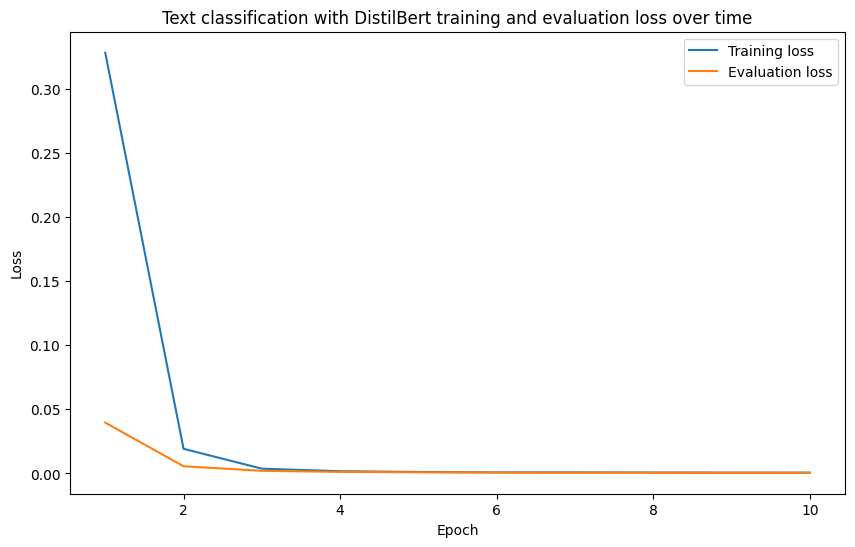

In [53]:
# Plot training and evaluation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(trainer_history_training_df["epoch"], trainer_history_training_df["loss"], label="Training loss")
plt.plot(trainer_history_eval_df["epoch"], trainer_history_eval_df["eval_loss"], label="Evaluation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Text classification with DistilBert training and evaluation loss over time")
plt.legend()
plt.show()

B-e-a-utiful!

That is exactly what we wanted.

Training and evaluation loss going down over time.

### Pushing our model to the Hugging Face Hub

We've saved our model locally and confirmed that it seems to be performing well on our training metrics but how about we push it to the Hugging Face Hub?

The Hugging Face Hub is one of the best sources of machine learning models on the internet.

And we can add our model there so others can use it or we can access it in the future (we could also keep it private on the Hugging Face Hub so only people from our organization can use it).

Sharing models on Hugging Face is also a great way to showcase your skills as a machine learning engineer, it gives you something to show potential employers and say "here's what I've done".

:::{.callout-note}

Before sharing a model to the Hugging Face Hub, be sure to go through the following steps: 

1. Setup a Hugging Face token using the [`huggingface-cli login` command](https://huggingface.co/docs/huggingface_hub/en/guides/cli).
2. Read through the [user access tokens guide](https://huggingface.co/docs/hub/en/security-tokens).
3. Set up an access token via [https://huggingface.co/settings/tokens](https://huggingface.co/settings/tokens) (ensure it has "write" access).

If you are using Google Colab, you can add your token under the "Secrets" tab on the left.

On my local computer, my token is saved to `/home/daniel/.cache/huggingface/token` (thanks to running `huggingface-cli login` on the command line).

And for more on sharing models to the Hugging Face Hub, be sure to check out the [model sharing documentation](https://huggingface.co/docs/transformers/en/model_sharing).

:::

We can push our model, tokenizer and other assosciated files to the Hugging Face Hub using the [`transformers.Trainer.push_to_hub`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.Trainer.push_to_hub) method. 

We can also optionally do the following:

* Add a [model card](https://huggingface.co/docs/hub/en/model-cards) (something that describes how the model was created and what it can be used for) using [`transformers.Trainer.create_model_card`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.Trainer.create_model_card).
* Add a custom `README.md` file to the model repository to explain more details about the model using [`huggingface_hub.HfApi.upload_file`](https://huggingface.co/docs/huggingface_hub/en/guides/upload#upload-a-file). This method is similar to model card creation method above but with more customization.

Let's save our model to the Hub!

In [54]:
# Save our model to the Hugging Face Hub
# This will be public, since we set hub_private_repo=False in our TrainingArguments
model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_HF_TOKEN_HERE" # This will default to the token you have saved in your Hugging Face config
)
print(f"[INFO] Model successfully uploaded to Hugging Face Hub with at URL: {model_upload_url}")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/commit/8a8a8aff5bdee5bc518e31558447dc684d448b8f', commit_message='Uploading food not food text classifier model', commit_description='', oid='8a8a8aff5bdee5bc518e31558447dc684d448b8f', pr_url=None, pr_revision=None, pr_num=None)

Model pushed to the Hugging Face Hub!

::: {.callout-note} 

You may see the following error:

> 403 Forbidden: You don't have the rights to create a model under the namespace "mrdbourke".
> Cannot access content at: https://huggingface.co/api/repos/create.
> If you are trying to create or update content, make sure you have a token with the `write` role.

Or even:

> HfHubHTTPError: 401 Client Error: Unauthorized for url: https://huggingface.co/api/repos/create (Request ID: Root=1-6699c52XXXXXX)
>
> Invalid username or password.

In this case, be sure to go through the [setup steps above](https://huggingface.co/docs/hub/en/security-tokens) to make sure you have a Hugging Face access token with "write" access.

:::

And since it's public (by default), you can see it at [https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased](https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased) (it gets saved to the same name as our target local directory). 

You can now share and interact with this model online.

As well as download it for use in your own applications.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/04-model-on-hf-hub.png"
     alt="
Side-by-side images showcasing the process of using a model from the Hugging Face Hub. The first image shows the model card page for 'learn_hf_food_not_food_text_classifier-distilbert-base-uncased' on Hugging Face Hub, highlighting the 'Use this model' button. The second image displays the code snippet provided by the Hugging Face Transformers library for utilizing the model in a text classification pipeline. This demonstrates the ease of accessing and implementing pretrained models from the Hugging Face Hub using the Transformers library." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>The Hugging Face Hub allows us to store and share models, datasets and demos. We can set these to be private or public. Models stored on the Hub can easily be accessed via Hugging Face Transformers.</figcaption>
</figure>

But before we make an application/demo with our trained model, let's keep evaluating it.

## Making and evaluating predictions on the test data

Model trained, let's now evaluate it on the test data.

Or step 7 in our workflow:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. ✅ Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. ✅ Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

A reminder that the test data is data that our model has never seen before.

So it will be a good estimate of how our model will do in a production setting.

We can make predictions on the test dataset using [`transformers.Trainer.predict`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.predict).

And then we can get the prediction values with the `predictions` attribute and assosciated metrics with the `metrics` attribute.

In [55]:
# Perform predictions on the test set
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on the test data:")
prediction_metrics

[INFO] Prediction metrics on the test data:


{'test_loss': 0.0005385442636907101,
 'test_accuracy': 1.0,
 'test_runtime': 0.0421,
 'test_samples_per_second': 1186.857,
 'test_steps_per_second': 47.474}

Woah!

Looks like our model did an outstanding job!

And it was *very* quick too.

This is one of the benefits of using a smaller pretrained model and customizing it to your own dataset.

You can achieve outstanding results in a very quick time as well as have a model capable of performing thousands of predictions per second.

We can also calculate the accuracy by hand by comparing the prediction labels to the test labels.

To do so, we'll:

1. Calculate the prediction probabilities (though this is optional as we could skip straight to 2 and get the same results) by passing the `prediction_values` to [`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
2. Find the index of the prediction value with the highest value (the index will be equivalent to the predicted label) using [`torch.argmax`](https://pytorch.org/docs/stable/generated/torch.argmax.html) (we could also use [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) here) to find the predicted labels. 
3. Get the true labels from the test dataset using `dataset["test"]["label"]`.
4. Compare the predicted labels from 2 to the true labels from 3 using [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to find the accuracy.

In [56]:
import torch
from sklearn.metrics import accuracy_score

# 1. Get prediction probabilities (this is optional, could get the same results with step 2 onwards)
pred_probs = torch.softmax(torch.tensor(prediction_values), dim=1)

# 2. Get the predicted labels
pred_labels = torch.argmax(pred_probs, dim=1)

# 3. Get the true labels
true_labels = dataset["test"]["label"]

# 4. Compare predicted labels to true labels to get the test accuracy
test_accuracy = accuracy_score(y_true=true_labels, 
                               y_pred=pred_labels)

print(f"[INFO] Test accuracy: {test_accuracy*100}%")

[INFO] Test accuracy: 100.0%


Woah!

Looks like our model performs really well on our test set.

It will be interesting to see how it goes on real world samples.

We'll test this later on.

How about we make a pandas DataFrame out of our test samples, predicted labels and predicted probabilities to further inspect our results?

In [57]:
# Make a DataFrame of test predictions
test_predictions_df = pd.DataFrame({
    "text": dataset["test"]["text"],
    "true_label": true_labels,
    "pred_label": pred_labels,
    "pred_prob": torch.max(pred_probs, dim=1).values
})

test_predictions_df.head()

,text,true_label,pred_label,pred_prob
0,A slice of pepperoni pizza with a layer of mel...,1,1,0.999369
1,Red brick fireplace with a mantel serving as a...,0,0,0.999662
2,A bowl of sliced bell peppers with a sprinkle ...,1,1,0.999365
3,Set of mugs hanging on a hook,0,0,0.999682
4,Standing floor lamp providing light next to an...,0,0,0.999678


We can find the examples with the lowest prediction probability to see where the model is unsure.

In [58]:
# Show 10 examples with low prediction probability
test_predictions_df.sort_values("pred_prob", ascending=True).head(10)

,text,true_label,pred_label,pred_prob
40,A bowl of cherries with a sprig of mint for ga...,1,1,0.999331
11,A close-up shot of a cheesy pizza slice being ...,1,1,0.999348
26,A fruit platter with a variety of exotic fruit...,1,1,0.999351
42,"Boxes of apples, pears, pineapple, manadrins a...",1,1,0.999353
46,A bowl of sliced kiwi with a sprinkle of sugar...,1,1,0.999360
37,"Close-up of a sushi roll with avocado, cucumbe...",1,1,0.999360
31,Crunchy sushi roll with tempura flakes or pank...,1,1,0.999360
9,Cherry tomatoes and mozzarella balls in a bowl...,1,1,0.999360
14,Two handfuls of bananas in a fruit bowl with g...,1,1,0.999360
44,Seasonal sushi roll with ingredients like pers...,1,1,0.999361


Hmmm, it looks like our model has quite a high prediction probability for almost all samples.

We can further evalaute our model by making predictions on new custom data.

## Making and inspecting predictions on custom text data

We've seen how our model performs on the test dataset (quite well).

But how might we check its performance on our own custom data?

For example, text-based image captions from the wild.

Well, we've got two ways to load our model now too:

1. Load model locally from our computer (e.g. via `models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).
2. Load model from Hugging Face Hub (e.g. via `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Either way of loading the model results in the same outcome: being able to make predictions on given data.

So how about we start by setting up our model paths for both local loading and loading from the Hugging Face Hub.

In [59]:
# Setup local model path
local_model_path = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Setup Hugging Face model path (see: https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased)
# Note: Be sure to change "mrdbourke" to your own Hugging Face username
huggingface_model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

### Discussing ways to make predictions (inference)

When we've loaded our trained model, because of the way we've set it up, there are two main ways to make predictions on custom data:

1. **Pipeline mode** using [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#pipelines) and passing it our target model, this allows us to preprocess custom data and make predictions in one step.
2. **PyTorch mode** using a combination of [`transformers.AutoTokenizer`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoTokenizer) and [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) and passing each our target model, this requires us to preprocess our data before passing to a model, however, it offers the most customization.

Each method supports:

1. Predictions one at a time (batch size of 1), for example, one person using the app at a time.
2. Batches of predictions at a time (predictions with a batch size of `n` where `n` can be any number, e.g. `8`, `16`, `32`), for example, many people using a service simultaneously such as a voice chat and needing to filter comments (predicting on batches of size `n` is usually much faster than batches of 1).

Whichever method we choose, we'll have to set the target device we'd like the operations to happen on.

In general, it's best to make predictions on the most powerful accelerator you have available.

And in most cases that will be a NVIDIA GPU > Mac GPU > CPU.

So let's write a small function to pick the target device for us in that order.

::: {.callout-note}

Making predictions is also referred to as **inference**.

Because the model is going to *infer* on some data what the output should be.

Inference is often faster than training on a per sample basis as no model weights are updated (less computation).

However, inference can use more compute than training over the long run because you could train a model once over a few hours (or days or longer) and then use it for inference for several months (or longer), millions of times (or more).

:::

In [60]:
def set_device():
    """
    Set device to CUDA if available, else MPS (Mac), else CPU.

    This defaults to using the best available device (usually).
    """
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

DEVICE = set_device()
print(f"[INFO] Using device: {DEVICE}")

[INFO] Using device: cuda


Target device set!

Let's start predicting.

### Making predictions with pipeline

The [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#transformers.pipeline) method creates a machine learning pipeline.

Data goes in one end and predictions come out the other end.

You can create pipelines for many different tasks, such as, text classification, image classification, object detection, text generation and more.

Let's see how we can create a pipeline for our text classification model.

To do so we'll:

1. Instantiate an instance of `transformers.pipeline`.
2. Pass in the `task` parameter of `text-classification` (we can do this because our model is already formatted for text classification thanks to using `transformers.AutoModelForSequenceClassification`).
3. Setup the `model` parameter to be `local_model_path` (though we could also use `huggingface_model_path`).
4. Set the target device using the `device` parameter.
5. Set `top_k=1` to get to the top prediction back (e.g. either `"food"` or `"not_food"`, could set this higher to get more labels back).
6. Set the `BATCH_SIZE=32` so we can pass to the `batch_size` parameter. This will allow our model to make predictions on up to `32` samples at a time. Predicting on batches of data is usually much faster than single samples at a time, however, this often saturates at a point (e.g. predicting on batches of size 64 may be the same speed as 32 due to memory contraints).

::: {.callout-note}

There are many more pipelines available in the [Hugging Face documentation](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#transformers.pipeline).

As an exericse, I'd spend 10-15 minutes reading through the pipeline documentation to get familiar with what's available.

:::

Let's setup our pipeline! 

In [61]:
import torch
from transformers import pipeline

# Set the batch size for predictions
BATCH_SIZE = 32

# Create an instance of transformers.pipeline
food_not_food_classifier = pipeline(task="text-classification", # we can use this because our model is an instance of AutoModelForSequenceClassification
                                    model=local_model_path, # could also pass in huggingface_model_path
                                    device=DEVICE, # set the target device
                                    top_k=1, # only return the top predicted value
                                    batch_size=BATCH_SIZE) # perform predictions on up to BATCH_SIZE number of samples at a time 

food_not_food_classifier

We've created an instance of [`transformers.pipelines.text_classification.TextClassificationPipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#transformers.TextClassificationPipeline)!

Now let's test it out by passing it a string of text about food.

In [62]:
# Test our trained model on some example text 
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"
food_not_food_classifier(sample_text_food)

[[{'label': 'food', 'score': 0.9993335604667664}]]

Nice! Our model gets it right.

How about a string *not* about food?

In [63]:
# Test the model on some more example text
sample_text_not_food = "A yellow tractor driving over the hill"
food_not_food_classifier(sample_text_not_food)

[[{'label': 'not_food', 'score': 0.9996254444122314}]]

Woohoo!

Correct again!

What if we passed in random text?

As in, someone types in something random to the model expecting an output.

In [64]:
# Pass in random text to the model
food_not_food_classifier("cvnhertiejhwgdjshdfgh394587")

[[{'label': 'not_food', 'score': 0.9985743761062622}]]

The nature of machine learning models is that they are a predictive/generative function.

If you input data, they will output something.

::: {.callout-note}

When deploying machine learning models, there are many things to take into consideration.

One of the main ones being: "what data is going to go into the model?"

If this was a public facing model and people could enter any kind of text, they could enter random text rather than a sentence about food or not food.

Since our main goal of the model is be able to classify image captions into `food`/`not_food`, we'd also have to consider image cpations that are poorly written or contain little text.

This is why it's important to continually test your models with as much example test/real-world data as you can.

:::

Our `pipeline` can also work with the model we saved to the Hugging Face Hub.

Let's try out the same pipeline with `model=hugggingface_model_path`.

In [65]:
# Pipeline also works with remote models (will have to laod the model locally first)
food_not_food_classifier_remote = pipeline(task="text-classification", 
                                           model=huggingface_model_path, # load the model from Hugging Face Hub (will download the model if it doesn't already exist)
                                           batch_size=BATCH_SIZE,
                                           device=DEVICE)

food_not_food_classifier_remote("This is some new text about bananas and pancakes and ice cream")

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

[{'label': 'food', 'score': 0.9993208646774292}]

Beautiful!

Our model loaded from Hugging Face gets it right too!

### Making multiple predictions at the same time with batch prediction

We can make predictions with our model one at a time but it's often much faster to do them in batches.

To make predictions in batches, we can set up our `transformers.pipeline` instance with the `batch_size` parameter greater than `1`.

Then we'll be able to pass multiple samples at once in the form of a Python list.

In [66]:
# Create batch size (we don't need to do this again but we're doing it for clarity)
BATCH_SIZE = 32 # this number is experimental and will require testing on your hardware to find the optimal value (e.g. lower if there are memory issues or higher to try speed up inference)

# Setup pipeline to handle batches (we don't need to do this again either but we're doing it for clarity)
food_not_food_classifier = pipeline(task="text-classification", 
                                    model=local_model_path,
                                    batch_size=BATCH_SIZE,
                                    device=DEVICE)

Wonderful, now we've set up a `pipeline` instance capable of handling batches, we can pass it a list of samples and it will make predictions on each.

How about we try with a collection of sentences which are a bit tricky?

In [67]:
# Create a list of sentences to make predictions on
sentences = [
    "I whipped up a fresh batch of code, but it seems to have a syntax error.",
    "We need to marinate these ideas overnight before presenting them to the client.",
    "The new software is definitely a spicy upgrade, taking some time to get used to.",
    "Her social media post was the perfect recipe for a viral sensation.",
    "He served up a rebuttal full of facts, leaving his opponent speechless.",
    "The team needs to simmer down a bit before tackling the next challenge.",
    "The presentation was a delicious blend of humor and information, keeping the audience engaged.",
    "A beautiful array of fake wax foods (shokuhin sampuru) in the front of a Japanese restaurant.",
    "Daniel Bourke is really cool :D",
    "My favoruite food is biltong!"
]

food_not_food_classifier(sentences)

[{'label': 'not_food', 'score': 0.9986234903335571},
 {'label': 'not_food', 'score': 0.9993952512741089},
 {'label': 'not_food', 'score': 0.9992876648902893},
 {'label': 'not_food', 'score': 0.9994683861732483},
 {'label': 'not_food', 'score': 0.9993450045585632},
 {'label': 'not_food', 'score': 0.9994571805000305},
 {'label': 'not_food', 'score': 0.9991866946220398},
 {'label': 'food', 'score': 0.9993101358413696},
 {'label': 'not_food', 'score': 0.9995250701904297},
 {'label': 'food', 'score': 0.9966572523117065}]

Woah! That was quick!

And it looks like our model performed fairly well.

Though there was one harder sample which may be deemed as `food`/`not_food`, the sentence containing "shokuhin sampuru" (meaning "[food model](https://en.wikipedia.org/wiki/Food_model)" in Japanese). 

Is a sentence about food models (fake foods) still about food?

### Time our model across larger sample sizes

We can *say* that our model is fast or that making predictions in batches is faster than one at a time.

But how about we run some tests to confirm this?

Let's start by making predictions one at a time across 100 sentences (10x our `sentences` list) and then we'll write some code to make predictions in batches.

We'll time each and see how they go.

In [69]:
import time

# Create 1000 sentences
sentences_1000 = sentences * 100

# Time how long it takes to make predictions on all sentences (one at a time)
print(f"[INFO] Number of sentences: {len(sentences_1000)}")
start_time_one_at_a_time = time.time()
for sentence in sentences_1000:
    # Make a prediction on each sentence one at a time
    food_not_food_classifier(sentence)
end_time_one_at_a_time = time.time()

print(f"[INFO] Time taken for one at a time prediction: {end_time_one_at_a_time - start_time_one_at_a_time} seconds")
print(f"[INFO] Avg inference time per sentence: {(end_time_one_at_a_time - start_time_one_at_a_time) / len(sentences_1000)} seconds")

[INFO] Number of sentences: 1000
[INFO] Time taken for one at a time prediction: 2.5376925468444824 seconds
[INFO] Avg inference time per sentence: 0.0025376925468444823 seconds


Ok, on my local NVIDIA RTX 4090 GPU, it took around 5.5 seconds to make 1000 predictions one at a time.

That's pretty good!

But let's see if we can make it faster with batching.

To do so, we can increase the size of our `sentences_big` list and pass the list directly to the model to enable batched prediction.


In [70]:
for i in [10, 100, 1000, 10_000]:
    sentences_big = sentences * i
    print(f"[INFO] Number of sentences: {len(sentences_big)}")

    start_time = time.time()
    # Predict on all sentences in batches 
    food_not_food_classifier(sentences_big)
    end_time = time.time()

    print(f"[INFO] Inference time for {len(sentences_big)} sentences: {round(end_time - start_time, 5)} seconds.")
    print(f"[INFO] Avg inference time per sentence: {round((end_time - start_time) / len(sentences_big), 8)} seconds.")
    print()

[INFO] Number of sentences: 100
[INFO] Inference time for 100 sentences: 0.04512 seconds.
[INFO] Avg inference time per sentence: 0.0004512 seconds.

[INFO] Number of sentences: 1000
[INFO] Inference time for 1000 sentences: 0.31447 seconds.
[INFO] Avg inference time per sentence: 0.00031447 seconds.

[INFO] Number of sentences: 10000
[INFO] Inference time for 10000 sentences: 1.82615 seconds.
[INFO] Avg inference time per sentence: 0.00018261 seconds.

[INFO] Number of sentences: 100000
[INFO] Inference time for 100000 sentences: 18.63373 seconds.
[INFO] Avg inference time per sentence: 0.00018634 seconds.



Woah!

It looks like inference/prediction time is ~10-20x faster when using batched prediction versus predicting one at a time (on my local NVIDIA RTX 4090).

I ran some more tests with the same model on a different GPU on Google Colab ([NVIDIA L4 GPU](https://www.nvidia.com/en-au/data-center/l4/)) and got similar results.

| Number of Sentences | Total Prediction Time | Prediction Type |
|:-----|:-----|:-----|
| 100           | 0.62                  | one at a time   |
| 1000          | 6.19                  | one at a time   |
| 10000         | 61.08                 | one at a time   |
| 100000        | 605.46                | one at a time   |
| 100           | 0.06                  | batch           |
| 1000          | 0.51                  | batch           |
| 10000         | 4.97                  | batch           |
| 100000        | 49.7                  | batch           |

*Testing the speed of a custom text classifier model on different numbers of sentences with one at a time or batched prediction. Tests conducted on Google Colab with a NVIDIA L4 GPU. See the [notebook for code to reproduce](https://colab.research.google.com/drive/14oC-UDCIHrvRZOEKnAvr6JIHrvZzXOkB?usp=sharing).*

### Making predictions with PyTorch

We've seen how to make predictions/perform inference with `transformers.pipeline`, now let's see how to do the same with PyTorch.

Performing predictions with PyTorch requires an extra step compared to `pipeline`, we have to prepare our inputs first (turn the text into numbers).

Good news is, we can prepare our inputs with the tokenizer that got automatically saved with our model.

And since we've already trained a model and uploaded it to the Hugging Face Hub, we can load our model and tokenizer with `transformers.AutoTokenizer` and `transformers.AutoModelForSequenceClassification` passing it the saved path we used (mine is `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Let's start by loading the tokenizer and see what it looks like to tokenize a piece of sample text.

In [71]:
from transformers import AutoTokenizer

# Setup model path (can be local or on Hugging Face)
# Note: Be sure to change "mrdbourke" to your own username
model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create an example to predict on
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"

# Prepare the tokenizer and tokenize the inputs
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
inputs = tokenizer(sample_text_food, 
                   return_tensors="pt") # return the output as PyTorch tensors 
inputs

{'input_ids': tensor([[  101,  1037, 12090,  6302,  1997,  1037,  5127,  1997, 13501,  6763,
          1010, 11611,  1998, 15174,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Nice!

Text tokenized!

We get a dictionary of `input_ids` (our text in token form) and `attention_mask` (tells the model which tokens to pay attention to, `1` = pay attention, `0` = no attention).

Now we can load the model with the same path.

In [72]:
from transformers import AutoModelForSequenceClassification

# Load our text classification model
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

Model loaded!

Let's make a prediction.

We can do so using the context manager `torch.no_grad()` (because no gradients/weights get updated during inference) and passing our model out `inputs` dictionary. 

::: {.callout-note}

A little tidbit about using dictionaries as function inputs in Python is the ability to unpack the keys of the dictionary into function arguments.

This is possible using `**TARGET_DICTIONARY` syntax. Where the `**` means "use all the keys in the dictionary as function parameters".

For example, the following two lines are equivalent:

```
# Using ** notation
outputs = model(**inputs)

# Using explicit notation
outputs = model(input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"])
```
:::

Let's make a prediction with PyTorch!

In [73]:
import torch

with torch.no_grad():
    outputs = model(**inputs) # '**' means input all of the dictionary keys as arguments to the function
    # outputs = model(input_ids=inputs["input_ids"],
    #                 attention_mask=inputs["attention_mask"]) # same as above, but explicitly passing in the keys

outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-3.3686,  3.9443]]), hidden_states=None, attentions=None)

Beautiful, we've got some outputs, which contain `logits` with two values (one for each class).

The index of the higher value is our model's predicted class.

We can find it by taking the `outputs.logits` and calling [`argmax().item()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) on it.

We can also find the prediction probability by passing `outputs.logits` to [`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

In [74]:
# Get predicted class and prediction probability
predicted_class_id = outputs.logits.argmax().item()
prediction_probability = torch.softmax(outputs.logits, dim=1).max().item()

print(f"Text: {sample_text_food}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")
print(f"Prediction probability: {prediction_probability}")

Text: A delicious photo of a plate of scrambled eggs, bacon and toast
Predicted label: food
Prediction probability: 0.9993335604667664


Beautiful! A prediction made with pure PyTorch! It looks very much correct too.

How about we put it all together?

In [75]:
import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

# Make sample text and tokenize it
sample_text = "A photo of a broccoli, salmon, rice and radish dish"
inputs = tokenizer(sample_text, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class and prediction probability
output_logits = outputs.logits
predicted_class_id = torch.argmax(output_logits, dim=1).item()
predicted_class_label = model.config.id2label[predicted_class_id]
predicted_probability = torch.softmax(output_logits, dim=1).max().item()

# Print outputs
print(f"Text: {sample_text}")
print(f"Predicted class: {predicted_class_label} (prob: {predicted_probability * 100:.2f}%)")

Text: A photo of a broccoli, salmon, rice and radish dish
Predicted class: food (prob: 99.94%)


## Putting it all together

Ok, ok, we've covered a lot of ground going from dataset to trained model to making predictions on custom samples.

How about we put all of the steps we've covered so far together in a single code cell (or two)?

To do so, we'll:

1. Import necessary packages (e.g. `datasets`, `transformers.pipeline`, `torch` and more).
2. Setup variables for model training and saving pipeline such as our model name, save directory and dataset name.
3. Create a directory for saving models.
4. Load and preprocess the dataset from Hugging Face Hub using `datasets.load_dataset`.
5. Import a tokenizer with `transformers.AutoTokenizer` and map it to our dataset with `dataset.map`.
6. Set up an evaluation metric with `evaluate` & create a function to evaluate our model's predictions.
7. Import a model with `transformers.AutoModelForSequenceClassification` and prepare it for training with `transformers.TrainingArguments` and `transformers.Trainer`.
8. Train the model on our text dataset by calling `transformers.Trainer.train`.
9. Save the trained model to a local directory.
10. Push the model to the Hugging Face Hub.
11. Evaluate the model on the test data.
12. Test the trained model on a custom sample using `transformers.pipeline` to make sure it works.

Phew!

A fair few steps but nothing we can't handle!

Let's do it.

In [76]:
# 1. Import necessary packages
import pprint
from pathlib import Path

import numpy as np
import torch

import datasets
import evaluate

from transformers import pipeline
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 2. Setup variables for model training and saving pipeline
DATASET_NAME = "mrdbourke/learn_hf_food_not_food_image_captions"
MODEL_NAME = "distilbert/distilbert-base-uncased"
MODEL_SAVE_DIR_NAME = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# 3. Create a directory for saving models
# Note: This will override our existing saved model (if there is one)
print(f"[INFO] Creating directory for saving models: {MODEL_SAVE_DIR_NAME}")
model_save_dir = Path(MODEL_SAVE_DIR_NAME)
model_save_dir.mkdir(parents=True, exist_ok=True)

# 4. Load and preprocess the dataset from Hugging Face Hub
print(f"[INFO] Downloading dataset from Hugging Face Hub, name: {DATASET_NAME}")
dataset = datasets.load_dataset(path=DATASET_NAME)

# Create mappings from id2label and label2id (adjust these for your target dataset, can also create these programmatically)
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

# Create function to map IDs to labels in dataset
def map_labels_to_number(example):
    example["label"] = label2id[example["label"]]
    return example

# Map preprocessing function to dataset
dataset = dataset["train"].map(map_labels_to_number)

# Split the dataset into train/test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# 5. Import a tokenizer and map it to our dataset
print(f"[INFO] Tokenizing text for model training with tokenizer: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=MODEL_NAME,
                                          use_fast=True)

# Create a preprocessing function to tokenize text
def tokenize_text(examples):
    return tokenizer(examples["text"],
                     padding=True,
                     truncation=True)

tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True,
                                batch_size=1000)

# 6. Set up an evaluation metric & function to evaluate our model
accuracy_metric = evaluate.load("accuracy")

def compute_accuracy(predictions_and_labels):
    predictions, labels = predictions_and_labels

    if len(predictions.shape) >= 2:
        predictions = np.argmax(predictions, axis=1)
    
    return accuracy_metric.compute(predictions=predictions, references=labels) # note: use "references" parameter rather than "labels"


# 7. Import a model and prepare it for training 
print(f"[INFO] Loading model: {MODEL_NAME}")
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=MODEL_NAME,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)
print(f"[INFO] Model loading complete!")

# Setup TrainingArguments
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    push_to_hub=False,
    hub_private_repo=False # Note: if set to False, your model will be publically available
)

# Create Trainer instance and train model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_accuracy
)

# 8. Train the model on our text dataset
print(f"[INFO] Commencing model training...")
results = trainer.train()

# 9. Save the trained model (note: this will overwrite our previous model, this is ok)
print(f"[INFO] Model training complete, saving model to local path: {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

# 10. Push the model to the Hugging Face Hub
print(f"[INFO] Uploading model to Hugging Face Hub...")
model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_HF_TOKEN_HERE" # requires a "write" HF token 
)
print(f"[INFO] Model upload complete, model available at: {model_upload_url}")

# 11. Evaluate the model on the test data
print(f"[INFO] Performing evaluation on test dataset...")
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on the test data:")
pprint.pprint(prediction_metrics)

[INFO] Creating directory for saving models: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased
[INFO] Downloading dataset from Hugging Face Hub, name: mrdbourke/learn_hf_food_not_food_image_captions
[INFO] Tokenizing text for model training with tokenizer: distilbert/distilbert-base-uncased
[INFO] Loading model: distilbert/distilbert-base-uncased


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] Model loading complete!
[INFO] Commencing model training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.372500,0.067892,1.000000
2,0.028300,0.009194,1.000000
3,0.004700,0.004919,1.000000
4,0.002000,0.002121,1.000000
5,0.001200,0.001302,1.000000
6,0.000900,0.000982,1.000000
7,0.000800,0.000839,1.000000
8,0.000700,0.000766,1.000000
9,0.000700,0.000728,1.000000
10,0.000700,0.000715,1.000000


[INFO] Model training complete, saving model to local path: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased
[INFO] Uploading model to Hugging Face Hub...


training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO] Model upload complete, model available at: https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/tree/main/
[INFO] Performing evaluation on test dataset...


[INFO] Prediction metrics on the test data:
{'test_accuracy': 1.0,
 'test_loss': 0.0007152689504437149,
 'test_runtime': 0.0507,
 'test_samples_per_second': 986.278,
 'test_steps_per_second': 39.451}


Woohoo! It all worked!

Now let's make it sure works by turing it into a `transformers.pipeline` and passing it a custom sample.

In [77]:
# 12. Make sure the model works by testing it on a custom sample
food_not_food_classifier = pipeline(task="text-classification",
                                    model=model_save_dir, # can also use model on Hugging Face Hub path 
                                    device=torch.device("cuda") if torch.cuda.is_available() else "cpu",
                                    top_k=1,
                                    batch_size=32)

food_not_food_classifier("Yo! We just built a food not food sentence classifier model! Good news is, it can be replicated for other kinds of text classification!")

[[{'label': 'food', 'score': 0.9969706535339355}]]

Nice!

Looks like putting all of our code in one cell worked.

How about we make our model even more accessible by turning it into a demo?

## Turning our model into a demo

Once you've trained and saved a model, one of the best ways to continue to test it and show/share it with others is to create a demo.

Or step number 8 in our workflow:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. ✅ Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. ✅ Save the model (to our local machine or to the Hugging Face Hub).
7. ✅ Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

A demo is a small application with the focus of showing the workflow of your model from data in to data out.

It's also one way to start testing your model in the wild.

You may know where it works and where it doesn't but chances are someone out there will find a new bug before you do.

To build our demo, we're going to use an open-source library called [Gradio](https://www.gradio.app/guides/quickstart). 

Gradio allows you to make machine learning demo apps with Python code and best of all, it's part of the Hugging Face ecosystem so you can share your demo to the public directly through Hugging Face.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/06-gradio-workflow-for-ml-demos.png"
     alt="Diagram illustrating the workflow for creating machine learning demos using Gradio. The process starts with data from datasets, which is fed into a model built using Transformers. The model is then used to create a demo hosted on Hub/Spaces/Gradio. The Gradio interface helps visualize the workflow, with inputs such as 'A photo of sushi rolls on a white plate' and 'A yellow tractor driving over a grassy hill'. These inputs are processed by the model to produce outputs classified as 'Food' or 'Not Food'. This setup demonstrates how Gradio facilitates the creation of interactive ML demos." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Going on the premise of data, model, demo, Gradio helps to create the demo. Once you've got a trained model on the Hugging Face Hub, you can setup a Gradio interface to import that model and interact it with it. Gradio interfaces can be deployed on Hugging Face Spaces and shared with others so they can try your model too.</figcaption>
</figure>

Gradio works on the premise of input -> function (this could be a model) -> output.

In our case:

* Input = A string of text.
* Function = Our trained text classification model.
* Output = Predicted output of food/not_food with prediction probability.

### Creating a simple function to perform inference

Let's create a function to take an input of text, process it with our model and return a dictionary of the predicted labels.

Our function will:

1. Take an input of a string of text.
2. Setup a text classification pipeline using `transformers.pipeline` as well as our trained model (this can be from our local machine or loaded from Hugging Face). We'll return all the probabilities from the output using `top_k=None`.
3. Get the outputs of the text classification pipeline from 2 as a list of dictionaries (e.g. `[{'label': 'food', 'score': 0.999105}, {'label': 'not_food', 'score': 0.00089}]`).
4. Format and return the list of dictionaries from 3 to be compatible with Gradio's [`gr.Label`](https://www.gradio.app/docs/gradio/label) output (we'll see this later) which requires a dictionary in the form `[{"label_1": probability_1, "label_2": probability_2}]`.

Onward!

In [78]:
from typing import Dict

# 1. Create a function which takes text as input 
def food_not_food_classifier(text: str) -> Dict[str, float]:
    """
    Takes an input string of text and classifies it into food/not_food in the form of a dictionary.
    """

    # 2. Setup the pipeline to use the local model (or Hugging Face model path)
    food_not_food_classifier = pipeline(task="text-classification", 
                                        model=local_model_path,
                                        batch_size=32,
                                        device="cuda" if torch.cuda.is_available() else "cpu", # set the device to work in any environment
                                        top_k=None) # return all possible scores (not just top-1)
    
    # 3. Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]
    
    # 4. Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}
    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

# Test out the function
food_not_food_classifier("My lunch today was chicken and salad")

{'food': 0.9992194175720215, 'not_food': 0.0007805348141118884}

Beautiful!

Looks like our function is working.

### Building a small Gradio demo to run locally

We've got a working function to go from text to predicted labels and probabilities.

Let's now build a Gradio interface to showcase our model.

We can do so by:

1. Importing Gradio (using `import gradio as gr`).
2. Creating an instance of [`gr.Interface`](https://www.gradio.app/docs/gradio/interface) with parameters `inputs="text"` (for our text-based inputs) called `demo` and `outputs=gr.Label(num_top_classes=2)` to display our output dictionary. We can also add some descriptive aspects to our `demo` with the `title`, `description` and `examples` parameters.
3. Running/launching the demo with [`gr.Interface.launch()`](https://www.gradio.app/docs/gradio/interface#interface-launch).


In [79]:
# 1. Import Gradio as the common alias "gr"
import gradio as gr

# 2. Setup a Gradio interface to accept text and output labels
demo = gr.Interface(
    fn=food_not_food_classifier, 
    inputs="text", 
    outputs=gr.Label(num_top_classes=2), # show top 2 classes (that's all we have)
    title="Food or Not Food Classifier",
    description="A text classifier to determine if a sentence is about food or not food.",
    examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
              ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

# 3. Launch the interface
demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Woohoo!

We've made a very clean way of interacting with our model.

However, our model is still only largely accessible to us (except for the model file we've uploaded to Hugging Face).

How about we make our demo publicly available so it's even easier for people to interact with our model?

::: {.callout-note}

The [`gradio.Interface`](https://www.gradio.app/docs/gradio/interface) class is full of many different options, I'd highly recommend reading through the documentation for 10-15 minutes to get an idea of it.

If your workflow requires inputs -> function (e.g. a model making predictions on the input) -> output, chances are, you can build it with Gradio.

:::

## Making our demo publicly accessible

One of the best ways to share your machine learning work is by creating an application.

And one of the best places to share your applications is [Hugging Face Spaces](https://huggingface.co/docs/hub/spaces).

Hugging Face Spaces allows you to host machine learning (and non-machine learning) applications for free (with [optional paid hardware upgrades](https://huggingface.co/docs/hub/spaces-overview#hardware-resources)).

If you're familiar with GitHub, Hugging Face Spaces works similar to a GitHub repository (each Space is a Git repository itself).

If not, that's okay, think of Hugging Face Spaces as an online folder where you can upload your files and have them accessed by others.

Creating a Hugging Face Space can be done in two main ways:

1. **Manually** - By going to the [Hugging Face Spaces](https://huggingface.co/spaces) website and clicking "Create new space". Or by going directly to [https://www.huggingface.co/new-space](https://huggingface.co/new-space). Here, you'll be able to setup a few settings for your Space and choose the framework/runtime (e.g. Streamlit, Gradio, Docker and more).
2. **Programmatically** - By using the [Hugging Face Hub Python API](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api) we can write code to [directly upload files to the Hugging Face Hub](https://www.gradio.app/guides/using-hugging-face-integrations#hosting-your-gradio-demos-on-spaces), including Hugging Face Spaces.

Both are great options but we're going to take the second approach.

This is so we can create our Hugging Face Space right from this notebook.

To do so, we'll create three files:

1. `app.py` - This will be the Python file which will be the main running file on our Hugging Face Space. Inside we'll include all the code necessary to run our Gradio demo (as above). Hugging Face Spaces will automatically recoginize the `app.py` file and run it for us.
2. `requirements.txt` - This text file will include all of the Python packages we need to run our `app.py` file. Before our Space starts to run, all of the packages in this file will be installed.
3. `README.md` - This markdown file will include details about our Space as well as specific Space-related metadata (we'll see this later on).

We'll create these files with the following file structure:

```
demos/
└── food_not_food_text_classifier/
    ├── app.py
    ├── README.md
    └── requirements.txt
```

Why this way?

Doing it in the above style means we'll have a directory which contains all of our demos (`demos/`) as well as a dedicated directory which contains our `food`/`not_food` demo application (`food_not_food_text_classifier/`).

This way, we'll be able to upload the whole `demos/food_not_food_text_classifier/` folder to Hugging Face Spaces.

Let's start by making a directory to store our demo application files.



In [80]:
from pathlib import Path

# Make a directory for demos
demos_dir = Path("../demos")
demos_dir.mkdir(exist_ok=True)

# Create a folder for the food_not_food_text_classifer demo
food_not_food_text_classifier_demo_dir = Path(demos_dir, "food_not_food_text_classifier")
food_not_food_text_classifier_demo_dir.mkdir(exist_ok=True)

Demo directory created, let's now create our requried files.

### Making an app file

Our `app.py` file will be the main part of our Hugging Face Space.

The good news is, we've already created most of it when we created our original demo. 

Inside the `app.py` folder we'll:

1. Import the required libraries/packages for running our demo app.
2. Setup a function for going from text to our trained model's predicted outputs. And because our model is already hosted on the Hugging Face Hub, we can pass `pipeline` our model's name (e.g. `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`) and when we upload our `app.py` file to Hugging Face Spaces, it will load the model directly from the Hub.
    * **Note:** Be sure to change "`mrdbourke`" to your own Hugging Face username.
3. Create a demo just as before with `gr.Interface`.
4. Launch our demo with `gr.Interface.launch`.

We can write all of the above in a notebook cell.

And we can turn it into a file by using the [`%%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile) magic command and passing it our target filepath.

Let's do it!

In [81]:
%%writefile ../demos/food_not_food_text_classifier/app.py
# 1. Import the required packages
import torch
import gradio as gr

from typing import Dict
from transformers import pipeline

# 2. Define function to use our model on given text 
def food_not_food_classifier(text: str) -> Dict[str, float]:
    # Set up text classification pipeline
    food_not_food_classifier = pipeline(task="text-classification", 
                                        # Because our model is on Hugging Face already, we can pass in the model name directly
                                        model="mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased", # link to model on HF Hub
                                        device="cuda" if torch.cuda.is_available() else "cpu",
                                        top_k=None) # return all possible scores (not just top-1)
    
    # Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]

    # Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}
    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

# 3. Create a Gradio interface with details about our app
description = """
A text classifier to determine if a sentence is about food or not food. 

Fine-tuned from [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased) on a [small dataset of food and not food text](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

See [source code](https://github.com/mrdbourke/learn-huggingface/blob/main/notebooks/hugging_face_text_classification_tutorial.ipynb).
"""

demo = gr.Interface(fn=food_not_food_classifier, 
             inputs="text", 
             outputs=gr.Label(num_top_classes=2), # show top 2 classes (that's all we have)
             title="🍗🚫🥑 Food or Not Food Text Classifier",
             description=description,
             examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
                       ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

# 4. Launch the interface
if __name__ == "__main__":
    demo.launch()

Overwriting ../demos/food_not_food_text_classifier/app.py


`app.py` file created!

Now let's setup the requirements file. 

### Making a requirements file

When you upload an `app.py` file to Hugging Face Spaces, it will attempt to run it automatically.

And just like running the file locally, we need to make sure all of the required packages are available.

Otherwise our Space will produce an error like the following:

```
===== Application Startup at 2024-06-13 05:37:21 =====

Traceback (most recent call last):
  File "/home/user/app/app.py", line 1, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
```

Good news is, our demo only has three requirements: `gradio`, `torch`, `transformers`.

Let's create a `requirements.txt` file with the packages we need and save it to the same directory as our `app.py` file.

In [82]:
%%writefile ../demos/food_not_food_text_classifier/requirements.txt
gradio
torch
transformers

Overwriting ../demos/food_not_food_text_classifier/requirements.txt


Beautiful!

Hugging Face Spaces will automatically recognize the `requirements.txt` file and install the listed packages into our Space.

### Making a README file

Our `app.py` can contain information about our demo, however, we can also use a `README.md` file to further communicate our work.

::: {.callout-note}

It is common practice in Git repositories (including GitHub and Hugging Face Hub) to add a `README.md` file to your project so people can read more (hence "read me") about what your project is about.

:::

We can include anything in [markdown-style text](https://huggingface.co/docs/hub/en/spaces-config-reference) in the `README.md` file.

However, Spaces also have a special [YAML block](https://simple.wikipedia.org/wiki/YAML) at the top of the `README.md` file in the root directory with configuration details.

Inside the YAML block you can put special metadata details about your Space including:

* `title` - The title of your Space (e.g. `title: Food Not Food Text Classifier`).
* `emoji` - The emoji to display on your Space (e.g. `emoji: 🍗🚫🥑`).
* `app_file` - The target app file for Spaces to run (set to `app_file: app.py` by default).

And there are plenty more in the [Spaces Configuration References documentation](https://huggingface.co/docs/hub/en/spaces-config-reference).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/08-huggingface-spaces-yaml-front-matter.png"
     alt="Screenshot of a README.md file on Hugging Face Spaces. The file includes YAML front matter and Markdown content. The YAML front matter specifies the title as 'Food Not Food Text Classifier', with other attributes such as emoji, colorFrom, colorTo, sdk (Gradio), sdk_version, app_file, pinned, and license. Below the YAML section, the Markdown content includes a header 'Food Not Food Text Classifier' and a description of the project, which is a small demo to showcase a text classifier determining if a sentence is about food or not. The classifier is based on a DistilBERT model fine-tuned on a small synthetic dataset of 250 generated food or not food image captions." 
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Example of Hugging Face Spaces README.md file with YAML front matter (front matter is another term for "things at the front/top of the file") for formatting the Space.</figcaption>
</figure>

Let's create a `README.md` file with a YAML block at the top detailing some of the metadata about our project.

::: {.callout-note}

The YAML block at the top of the `README.md` can take some practice. 

If you want to see a demo of how one gets created, try making a Hugging Face Space with the "Create new Space" button on the [https://huggingface.co/spaces](https://huggingface.co/spaces) page and seeing what the `README.md` file starts with (that's how I found out what to do!).

:::

In [83]:
%%writefile ../demos/food_not_food_text_classifier/README.md
---
title: Food Not Food Text Classifier
emoji: 🍗🚫🥑
colorFrom: blue
colorTo: yellow
sdk: gradio
app_file: app.py
pinned: false
license: apache-2.0
---

# 🍗🚫🥑 Food Not Food Text Classifier

Small demo to showcase a text classifier to determine if a sentence is about food or not food.

DistillBERT model fine-tuned on a small synthetic dataset of 250 generated [Food or Not Food image captions](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

[Source code notebook](https://github.com/mrdbourke/learn-huggingface/blob/main/notebooks/hugging_face_text_classification_tutorial.ipynb).

Overwriting ../demos/food_not_food_text_classifier/README.md


`README.md` created!

Now let's check out the files we have in our `demos/food_not_food_text_classifier/` folder.

In [84]:
!ls ../demos/food_not_food_text_classifier

README.md  app.py  requirements.txt


Perfect!

Looks like we've got all the files we need to create our Space.

Let's upload them to the Hugging Face Hub.

### Uploading our demo to Hugging Face Spaces

We've created all of the files required for our demo, now for the fun part!

Let's upload them to Hugging Face Spaces.

To do so programmatically, we can use the [Hugging Face Hub Python API](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api).

::: {.callout-note}

The [Hugging Face Hub Python API](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api) has many different options for interacting with the Hugging Face Hub programmatically.

You can create repositories, upload files, upload folders, add comments, change permissions and much much more.

Be sure to explore the documentation for at least 10-15 minutes to get an idea of what's possible.

:::

To get our demo hosted on Hugging Face Spaces we'll go through the following steps:

1. Import the required methods from the `huggingface_hub` package, including [`create_repo`](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api#huggingface_hub.HfApi.create_repo), [`get_full_repo_name`](https://huggingface.co/docs/huggingface_hub/package_reference/hf_api#huggingface_hub.HfApi.get_full_repo_name), [`upload_file`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_file) (optional, we'll be using `upload_folder`) and [`upload_folder`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_folder).
2. Define the demo folder we'd like to upload as well as the different parameters for the Hugging Face Space such as repo type (`"space"`), our target Space name, the target Space SDK (`"gradio"`), our [Hugging Face token](https://huggingface.co/docs/hub/en/security-tokens) with write access (optional if it already isn't setup).
3. Create a repository on Hugging Face Spaces using the `huggingface_hub.create_repo` method and filling out the appropriate parameters.
4. Get the full name of our created repository using the `huggingface_hub.get_full_repo_name` method (we could hard code this but I like to get it programmatically incase things change).
5. Upload the contents of our target demo folder (`../demos/food_not_food_text_classifier/`) to Hugging Face Hub with [`huggingface_hub.upload_folder`](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.upload_folder).
6. Hope it all works and inspect the results! 🤞

A fair few steps but we've got this!

In [85]:
# 1. Import the required methods for uploading to the Hugging Face Hub
from huggingface_hub import (
    create_repo,
    get_full_repo_name,
    upload_file, # for uploading a single file (if necessary)
    upload_folder # for uploading multiple files (in a folder)
)

# 2. Define the parameters we'd like to use for the upload
LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD = "../demos/food_not_food_text_classifier"
HF_TARGET_SPACE_NAME = "learn_hf_food_not_food_text_classifier_demo"
HF_REPO_TYPE = "space" # we're creating a Hugging Face Space
HF_SPACE_SDK = "gradio"
HF_TOKEN = "" # optional: set to your Hugging Face token (but I'd advise storing this as an environment variable as previously discussed)

# 3. Create a Space repository on Hugging Face Hub 
print(f"[INFO] Creating repo on Hugging Face Hub with name: {HF_TARGET_SPACE_NAME}")
create_repo(
    repo_id=HF_TARGET_SPACE_NAME,
    # token=HF_TOKEN, # optional: set token manually (though it will be automatically recognized if it's available as an environment variable)
    repo_type=HF_REPO_TYPE,
    private=False, # set to True if you don't want your Space to be accessible to others
    space_sdk=HF_SPACE_SDK,
    exist_ok=True, # set to False if you want an error to raise if the repo_id already exists 
)

# 4. Get the full repository name (e.g. {username}/{model_id} or {username}/{space_name})
full_hf_repo_name = get_full_repo_name(model_id=HF_TARGET_SPACE_NAME)
print(f"[INFO] Full Hugging Face Hub repo name: {full_hf_repo_name}")

# 5. Upload our demo folder
print(f"[INFO] Uploading {LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD} to repo: {full_hf_repo_name}")
folder_upload_url = upload_folder(
    repo_id=full_hf_repo_name,
    folder_path=LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD,
    path_in_repo=".", # upload our folder to the root directory ("." means "base" or "root", this is the default)
    # token=HF_TOKEN, # optional: set token manually
    repo_type=HF_REPO_TYPE,
    commit_message="Uploading food not food text classifier demo app.py"
)
print(f"[INFO] Demo folder successfully uploaded with commit URL: {folder_upload_url}")

[INFO] Creating repo on Hugging Face Hub with name: learn_hf_food_not_food_text_classifier_demo
[INFO] Full Hugging Face Hub repo name: mrdbourke/learn_hf_food_not_food_text_classifier_demo
[INFO] Uploading ../demos/food_not_food_text_classifier to repo: mrdbourke/learn_hf_food_not_food_text_classifier_demo
[INFO] Demo folder successfully uploaded with commit URL: https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo/tree/main/.


Excellent!

Looks like all of the files in our target demo folder were uploaded!

Once this happens, Hugging Face Spaces will take a couple of minutes to build our application.

If there are any errors, it will let us know.

Otherwise, our demo application should be running live and be ready to test at a URL similar to: [https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) (though you may have to swap my username "`mrdbourke`" for your own as well as the name you chose for the Space).

### Testing our hosted demo

One of the really cool things about Hugging Face Spaces is that we can share our demo application as a link so others can try it out.

We can also embed it right into our notebook.

To do so, we can go to the three dots in the top right of our [hosted Space](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) and select "Embed this Space".

We then have the option to embed our Space using a JavaScript web component, HTML `iframe` or via the direct URL.

Since Jupyter notebooks have the ability to render HTML via [`IPython.display.HTML`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.HTML), let's embed our Space with HTML.

In [87]:
from IPython.display import HTML


# You can get embeddable HTML code for your demo by clicking the "Embed" button on the demo page
HTML(data='''
<iframe
	src="https://mrdbourke-learn-hf-food-not-food-text-classifier-demo.hf.space"
	frameborder="0"
	width="850"
	height="450"
></iframe>     
''')

Now that's cool!

We can try out our Food Not Food Text Classifier app from right within our notebook!

## Summary

You should be very proud of yourself!

We've just gone end-to-end on a machine learning workflow with Hugging Face.

From loading a dataset to training a model to deploying that model in the form of a public demo.

Here are some of the main takeaways from this project.

**The Hugging Face ecosystem is a collection of powerful and open-source tools for machine learning workflows.**

* Hugging Face `datasets` helps you to store and preprocess datasets of almost any shape and size.
* Hugging Face `transformers` has many built-in pretrained models for many different use cases and components such as `transformers.Trainer` help you to tailor those models to your own custom use cases.
* Hugging Face `tokenizers` works closely with `transformers` and allows the efficient conversion of raw text data into numerical representation (which is required for machine learning models). 
* The Hugging Face Hub is a great place to share your models and machine learning projects. Over time, you can build up a portfolio of machine learning-based projects to show future employers or clients and to help the community grow.
* There are many more, but I'll leave these for you to explore as extra-curriculum.

**A common machine learning workflow: dataset -> model -> demo.**

Before a machine learning model is incorporated into a larger application, a very common workflow is to:

1. Find an existing or create a new dataset for your specific problem.
2. Train/fine-tune and evaluate an existing model on your dataset.
3. Create a small demo application to test your trained model. 

We've just gone through all of these steps for text classification! 

Text classification is a very common problem in many business settings. If you have a similar problem but a different dataset, you can replicate this workflow.

**Building your own model has several advantages over using APIs.**

APIs are very helpful to try something out.

However, depending on your use case, you may often want to create your own custom model.

Training your own model can often result in faster predictions and far less running costs over time.

The Hugging Face ecosystem enables the creation of custom models for almost any kind of machine learning problem.

## Exercises and Extensions

There's no better way to improve other than practicing what you've learned.

The following exercises and extensions are designed for you to practice the things we've covered in this project.

1. Our text classification model works on `food`/`not_food` text samples. How would you create your own binary text classification model on different classes?
    * Create ~10 or samples of your own text classes (e.g. 10 samples each of `spam`/`not_spam` emails) and retrain a text classification model.
    * Bonus: Share the model you've made in a demo just like we did here. Send it to me, I'd love to see it! My email is on [my website](https://www.mrdbourke.com).
2. We've trained our model on two classes (binary classification) but how might we increase that to 3 or more classes (multi-class classification)?
    * Hint: see the `num_labels` parameter in `transformers.AutoModelForSequenceClassification`. 
3. Our model seems to work pretty good on our test data and on the few number of examples we tried manually. Can you find any examples where our model fails? For example, what kind of sentences does it struggle with? How could you fix this?
    * Hint: Our model has been trained on examples with at least 5-12 words, does it still work with short sentences? (e.g. "pie").
    * Bonus: If you find any cases where our model doesn't perform well, make an extra 10-20 examples of these and add them to the dataset and then retrain the model (you'll have to lookup ["how to add rows to an existing Hugging Face dataset"](https://discuss.huggingface.co/t/how-do-i-add-things-rows-to-an-already-saved-dataset/27423)). How does the model perform after adding these additional samples?
4. Datasets are fundamental to any machine learning project, getting to know how to process and interact with them is a fundamental skill. Spend 1 hour going through the [Hugging Face Datasets tutorial](https://huggingface.co/docs/datasets/en/tutorial).
    * Write 5 things you can do with Hugging Face Datasets and where they might come in handy.
5. The Hugging Face `transformers` library has many features. The following readings are to help understand a handful of them.
    * Spend 10 minutes exploring the [`transformers.TrainingArguments` documentation](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
    * Spend 10 minutes reading the [`transformers.Trainer` documentation](https://huggingface.co/docs/transformers/en/main_classes/trainer#trainer).  
    * Spend 10 minutes reading the Hugging Face [model sharing documentation](https://huggingface.co/docs/transformers/en/model_sharing).  
    * Spend 10 minutes reading the Hugging Face [`transformers.pipeline` documentation](https://huggingface.co/docs/transformers/en/main_classes/pipelines#pipelines).  
        * What does a `pipeline` do?
        * Name 3 different kinds of pipelines and describe what they do in a sentence
6. Gradio is a powerful library for making machine learning demos, learning more about it will help you in future creations. Spend 10-15 minutes reading the [Gradio quickstart documentation](https://www.gradio.app/guides/quickstart). 
    * What are 3 kinds of demos you can create?
    * What are 3 different inputs and outputs you can make?

## Extra resources

There are many things we touched over but didn't go into much depth in this notebook.

The following resources are for those who'd like to learn a little bit more.

* See how the food not food image caption dataset was created with synthetic text data (image captions generated by a Large Language Model) in the example [Google Colab notebook](https://colab.research.google.com/drive/14xr3KN_HINY5LjV0s2E-4i7v0o_XI3U8?usp=sharing).
* Hugging Face have a [great guide on sequence classification](https://huggingface.co/docs/transformers/en/tasks/sequence_classification) (it's what this notebook was built on).
* For more on the concept of padding and truncation in sequence processing, I'd recommend the [Hugging Face padding and truncation guide](https://huggingface.co/docs/transformers/en/pad_truncation). 
* For more on Transformers (the architecture) as well as the DistilBert model:
    - Read [*Transformers from scratch*](https://peterbloem.nl/blog/transformers) by Peter Bloem.
    - Watch [Andrej Karpathy's lecture on Transformers and their history](https://www.youtube.com/watch?v=XfpMkf4rD6E).
    - Read the original [*Attention is all you need*](https://arxiv.org/abs/1706.03762) paper (the paper that introduced the Transformer architecture).
    - Read the [*DistilBert paper*](https://arxiv.org/abs/1910.01108) from the Hugging Face team (paper that introduced the DistilBert architecture and training setup).
